# Applied Analytics ASG1, Ambrish Krishna Muralitharan, S10223486G<a id="top"></a>

## Table of Contents

### 1.	[Data Exploration & Manipulation](#part1)
   - [1.1 Problem Understanding](#part1.1)
       - [1.1.1 Load the Data](#part1.1.1)
       - [1.1.2 Data Cleansing](#part1.1.2)
   - [1.2 Data Exploration](#part1.2)
   - [1.3 Numerical Transformation](#part1.3)
   - [1.4 Categorical Encoding](#part1.4)
   - [1.5 Scaling the Data](#part1.5)
       
       
### 2.	[K-Means Clustering](#part2)
   - [2.1 Build Clustering model](#part2.1)
       - [2.1.1 Build and Fit Model](#part2.1.1)
       - [2.1.2 View Coordinates of Cluster Centers](#part2.1.2)
       - [2.1.3 Assigning of Objects to the cluster represented by its nearest centroid](#part2.1.3)
   - [2.2 Visualising the Cluster](#part2.2)
   - [2.3 Elbow Method](#part2.3)
   - [2.4 Optimise Cluster](#part2.4)
   - [2.5 Cluster Analysis](#part2.5)
   - [2.6 Evaluate the Model](#part2.6)
   
### 3.	[Hierarchical Clustering](#part3)
   - [3.1 Build Clustering Model](#part3.1)
       - [3.1.1 Generate Distance Matrix](#part3.1.1)
       - [3.1.2 Perform Agglomerative Clustering and Generate Dendogram](#part3.1.2)
       - [3.1.3 Build and Fit Model](#part3.1.3)
   - [3.2 Visualising the Cluster](#part3.2)
   - [3.3 Improve and Evaluate Model](#part3.3)
   - [3.4 Cluster Analysis](#part3.4)

In [1]:
# import the required packages

#BASIC
import numpy as np
import pandas as pd

#VISUAL
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
import matplotlib.ticker as ticker

#Categorical Encoding
from sklearn.preprocessing import LabelEncoder

#SCALING
from sklearn.preprocessing import StandardScaler, normalize 

#CLUSTER MODELS
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering 
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist

# 1. Data exploration and manipulation<a id="part1"></a>
[Back to top](#top)

### 1.1 Problem Understanding<a id="part1.1"></a>
[Back to top](#top)

## 1.1.1 Load the Data<a id="part1.1.1"></a>
[Back to top](#top)

In [2]:
df=pd.read_csv('Used_Car_Price.csv')
print(df.shape)

(2059, 19)


In [3]:
df.head()

MAKE                            MODEL  PRICE  YEAR  KILOMETER  \
0          Honda              Amaze 1.2 VX i-VTEC  12625  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI  11250  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   5500  2011      67000   
3         Toyota                         Glanza G  19975  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  48750  2018      69000   

  FUEL TYPE TRANSMISSION   COLOR   OWNER SELLER TYPE  ENGINE CAPACITY   \
0    Petrol       Manual    Grey   First   Corporate            1198.0   
1    Diesel       Manual   White  Second  Individual            1248.0   
2    Petrol       Manual  Maroon   First  Individual            1197.0   
3    Petrol       Manual     Red   First  Individual            1197.0   
4    Diesel       Manual    Grey   First  Individual            2393.0   

            MAX POWER              MAX TORQUE DRIVETRAIN  LENGTH   WIDTH  \
0   87 bhp @ 6000 rpm       109 Nm @ 4500 rpm        FWD  3990.0  1680.0   
1   74 bhp @ 4000 rpm       190 Nm @ 2000 rpm        FWD  3995.0  1695.0   
2   79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm        FWD  3585.0  1595.0   
3   82 bhp @ 6000 rpm       113 Nm @ 4200 rpm        FWD  3995.0  1745.0   
4  148 bhp @ 3400 rpm       343 Nm @ 1400 rpm        RWD  4735.0  1830.0   

   HEIGHT  SEATING CAPACITY  FUEL TANK CAPACITY  
0  1505.0               5.0                35.0  
1  1555.0               5.0                42.0  
2  1550.0               5.0                35.0  
3  1510.0               5.0                37.0  
4  1795.0               7.0                55.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MAKE                2059 non-null   object 
 1   MODEL               2059 non-null   object 
 2   PRICE               2059 non-null   int64  
 3   YEAR                2059 non-null   int64  
 4   KILOMETER           2059 non-null   int64  
 5   FUEL TYPE           2059 non-null   object 
 6   TRANSMISSION        2059 non-null   object 
 7   COLOR               2059 non-null   object 
 8   OWNER               2059 non-null   object 
 9   SELLER TYPE         2059 non-null   object 
 10  ENGINE CAPACITY     1979 non-null   float64
 11  MAX POWER           1979 non-null   object 
 12  MAX TORQUE          1979 non-null   object 
 13  DRIVETRAIN          1923 non-null   object 
 14  LENGTH              1995 non-null   float64
 15  WIDTH               1995 non-null   float64
 16  HEIGHT

In [5]:
df.describe()

PRICE         YEAR     KILOMETER  ENGINE CAPACITY   \
count    2059.000000  2059.000000  2.059000e+03       1979.000000   
mean    42574.793589  2016.425449  5.422471e+04       1692.575543   
std     60497.015546     3.363564  5.736172e+04        643.736294   
min      1225.000000  1988.000000  0.000000e+00        624.000000   
25%     12125.000000  2014.000000  2.900000e+04       1197.000000   
50%     20625.000000  2017.000000  5.000000e+04       1498.000000   
75%     48125.000000  2019.000000  7.200000e+04       1995.000000   
max    875000.000000  2022.000000  2.000000e+06       6592.000000   

            LENGTH        WIDTH       HEIGHT  SEATING CAPACITY  \
count  1995.000000  1995.000000  1995.000000       1995.000000   
mean   4280.860652  1767.991980  1591.735338          5.306266   
std     442.458507   135.265825   136.073956          0.822170   
min    3099.000000  1475.000000  1165.000000          2.000000   
25%    3985.000000  1695.000000  1485.000000          5.000000   
50%    4370.000000  1770.000000  1545.000000          5.000000   
75%    4629.000000  1831.500000  1675.000000          5.000000   
max    5569.000000  2220.000000  1995.000000          8.000000   

       FUEL TANK CAPACITY  
count         1946.000000  
mean            52.002210  
std             15.110198  
min             15.000000  
25%             41.250000  
50%             50.000000  
75%             60.000000  
max            105.000000

## 1.1.2 Data Cleansing<a id="part1.1.2"></a>
[Back to top](#top)

In [6]:
df.isnull().any()

MAKE                  False
MODEL                 False
PRICE                 False
YEAR                  False
KILOMETER             False
FUEL TYPE             False
TRANSMISSION          False
COLOR                 False
OWNER                 False
SELLER TYPE           False
ENGINE CAPACITY        True
MAX POWER              True
MAX TORQUE             True
DRIVETRAIN             True
LENGTH                 True
WIDTH                  True
HEIGHT                 True
SEATING CAPACITY       True
FUEL TANK CAPACITY     True
dtype: bool

In [7]:
df.isnull().sum()

MAKE                    0
MODEL                   0
PRICE                   0
YEAR                    0
KILOMETER               0
FUEL TYPE               0
TRANSMISSION            0
COLOR                   0
OWNER                   0
SELLER TYPE             0
ENGINE CAPACITY        80
MAX POWER              80
MAX TORQUE             80
DRIVETRAIN            136
LENGTH                 64
WIDTH                  64
HEIGHT                 64
SEATING CAPACITY       64
FUEL TANK CAPACITY    113
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

MAKE                  0
MODEL                 0
PRICE                 0
YEAR                  0
KILOMETER             0
FUEL TYPE             0
TRANSMISSION          0
COLOR                 0
OWNER                 0
SELLER TYPE           0
ENGINE CAPACITY       0
MAX POWER             0
MAX TORQUE            0
DRIVETRAIN            0
LENGTH                0
WIDTH                 0
HEIGHT                0
SEATING CAPACITY      0
FUEL TANK CAPACITY    0
dtype: int64

## 1.2 Data Exploration<a id="part1.2"></a>
[Back to top](#top)

In [10]:
df['SELLER TYPE'].value_counts()

Individual                 1816
Corporate                    53
Commercial Registration       5
Name: SELLER TYPE, dtype: int64

In [11]:
df['MAKE'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'BMW', 'Skoda',
       'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford', 'Mercedes-Benz',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Chevrolet', 'Ssangyong', 'Fiat',
       'Rolls-Royce', 'Lexus'], dtype=object)

In [12]:
df['PRICE'] = df['PRICE'].astype(float)

In [13]:
# Extract only the numeric values from the "Max Power" column
df['NEW_MAX_POWER'] = df['MAX POWER']

df['NEW_MAX_POWER'] = df['NEW_MAX_POWER'].str.extract('(\d+)')

# Convert the "Max Power" column to numeric format
df['NEW_MAX_POWER'] = (df['NEW_MAX_POWER']).astype(float)

# Verify the changes
print(df['NEW_MAX_POWER'])


0        87.0
1        74.0
2        79.0
3        82.0
4       148.0
        ...  
2053     85.0
2054    138.0
2055     55.0
2056     70.0
2057    188.0
Name: NEW_MAX_POWER, Length: 1874, dtype: float64


In [14]:
# Extract only the numeric values from the "Max Power" column
df['NEW_MAX_TORQUE'] = df['MAX TORQUE']

df['NEW_MAX_TORQUE'] = df['NEW_MAX_TORQUE'].str.extract('(\d+)')

# Convert the "Max Power" column to numeric format
df['NEW_MAX_TORQUE'] = (df['NEW_MAX_TORQUE']).astype(float)

# Verify the changes
print(df['NEW_MAX_TORQUE'])

0       109.0
1       190.0
2       112.0
3       113.0
4       343.0
        ...  
2053    113.0
2054    330.0
2055     75.0
2056    102.0
2057    400.0
Name: NEW_MAX_TORQUE, Length: 1874, dtype: float64


In [15]:
df['NEW_MAX_TORQUE'].min()
#df['NEW_MAX_TORQUE'].max()

48.0

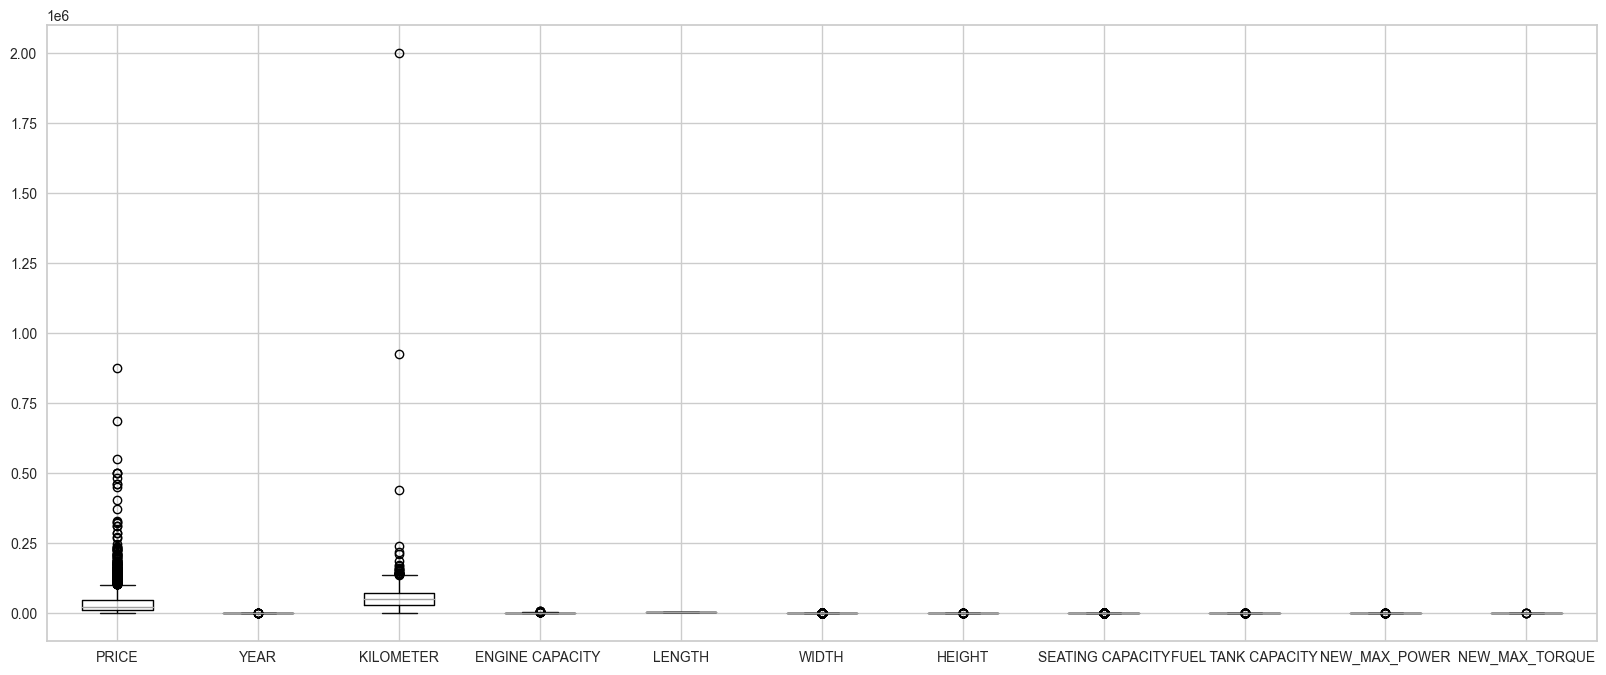

In [16]:
fig, ax = plt.subplots(figsize=(20, 8))  # Set the figure size as per your requirement

# Plot the boxplots
df.boxplot(ax=ax)

plt.show()

C:\Users\ambkr\AppData\Local\Temp\ipykernel_28808\2355739409.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


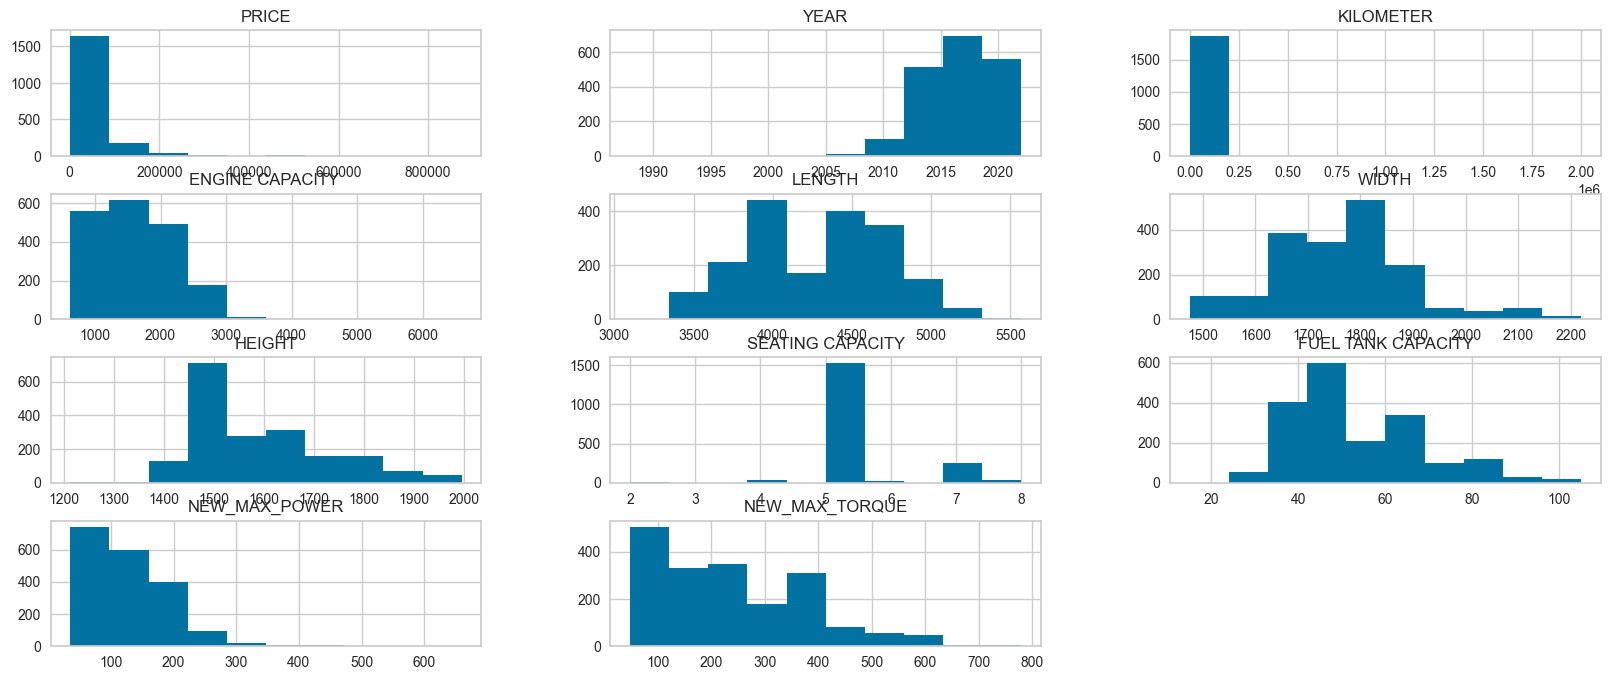

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))  # Set the figure size as per your requirement

# Plot the boxplots
df.hist(ax=ax)

plt.show()

In [18]:
#Numerical Columns
num_cols = [c for c in df.columns if df[c].dtypes!='O']
num_cols

['PRICE',
 'YEAR',
 'KILOMETER',
 'ENGINE CAPACITY ',
 'LENGTH',
 'WIDTH',
 'HEIGHT',
 'SEATING CAPACITY',
 'FUEL TANK CAPACITY',
 'NEW_MAX_POWER',
 'NEW_MAX_TORQUE']

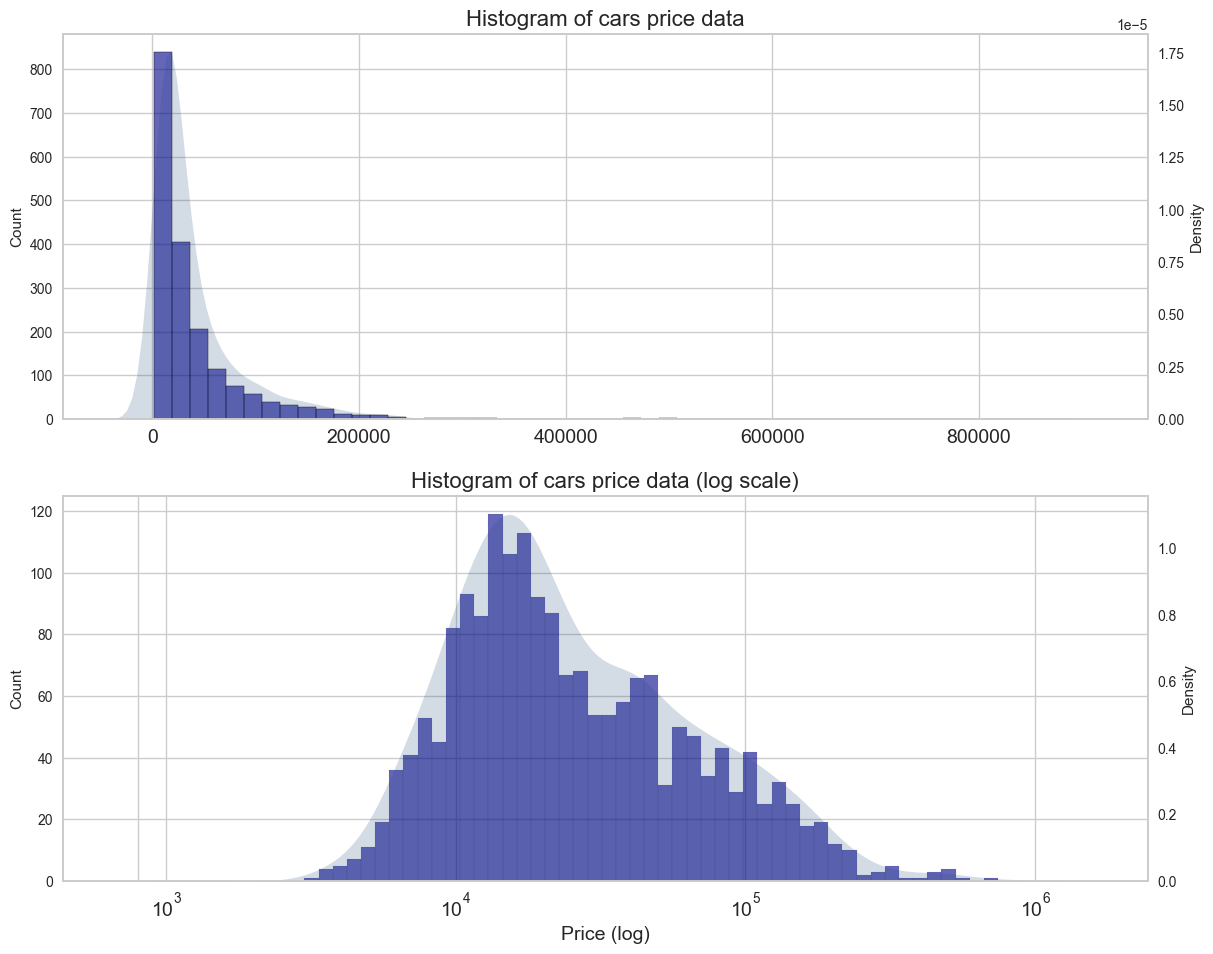

In [19]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='PRICE',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='PRICE', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='PRICE',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='PRICE', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

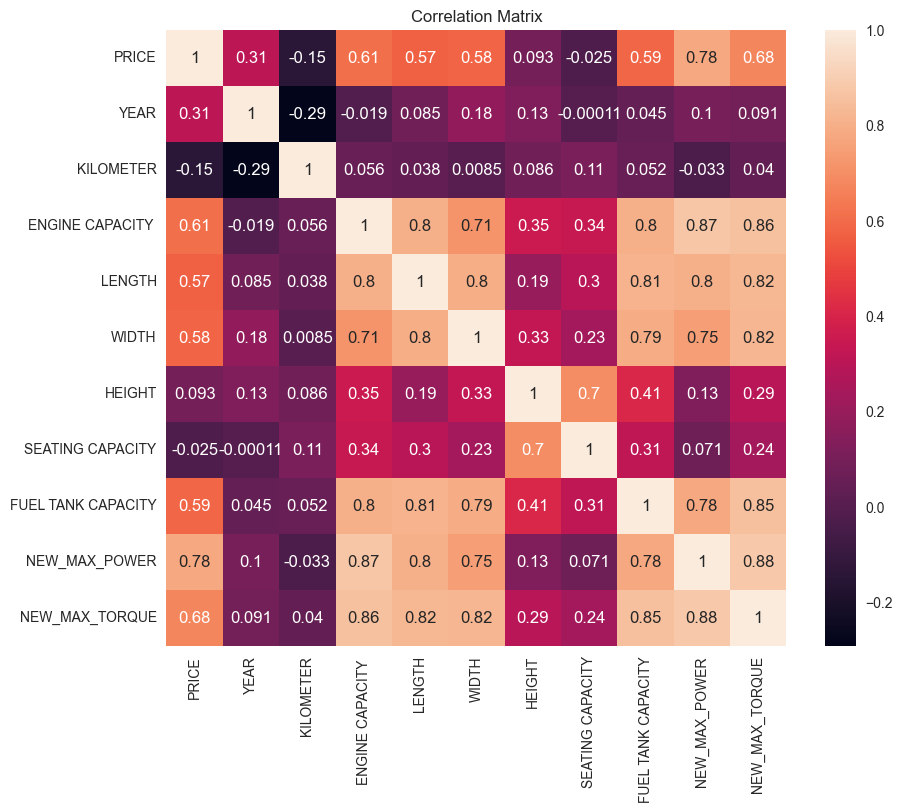

In [20]:
# Create correlation matrix
corr_matrix = df[num_cols].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [21]:
# Drop one or more variables (columns)
columns_to_drop = ['MAKE', 'MODEL', 'COLOR', 'MAX POWER', 'MAX TORQUE']
df= df.drop(columns_to_drop, axis=1)

# Verify the updated DataFrame
df.head()

PRICE  YEAR  KILOMETER FUEL TYPE TRANSMISSION   OWNER SELLER TYPE  \
0  12625.0  2017      87150    Petrol       Manual   First   Corporate   
1  11250.0  2014      75000    Diesel       Manual  Second  Individual   
2   5500.0  2011      67000    Petrol       Manual   First  Individual   
3  19975.0  2019      37500    Petrol       Manual   First  Individual   
4  48750.0  2018      69000    Diesel       Manual   First  Individual   

   ENGINE CAPACITY  DRIVETRAIN  LENGTH   WIDTH  HEIGHT  SEATING CAPACITY  \
0            1198.0        FWD  3990.0  1680.0  1505.0               5.0   
1            1248.0        FWD  3995.0  1695.0  1555.0               5.0   
2            1197.0        FWD  3585.0  1595.0  1550.0               5.0   
3            1197.0        FWD  3995.0  1745.0  1510.0               5.0   
4            2393.0        RWD  4735.0  1830.0  1795.0               7.0   

   FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  
0                35.0           87.0           109.0  
1                42.0           74.0           190.0  
2                35.0           79.0           112.0  
3                37.0           82.0           113.0  
4                55.0          148.0           343.0

## 1.3 Numerical Transformation<a id="part1.3"></a>
[Back to top](#top)

In [22]:
data = df.copy()

In [23]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram, Q-Q plot and box-plot
    # side by side, for a certain variable
    
    #define figure size
    plt.figure(figsize=(16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins =30)
    plt.title('Histogram')
    
    #Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y = df[variable])
    plt.title('Boxplot')
    

    plt.show()

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


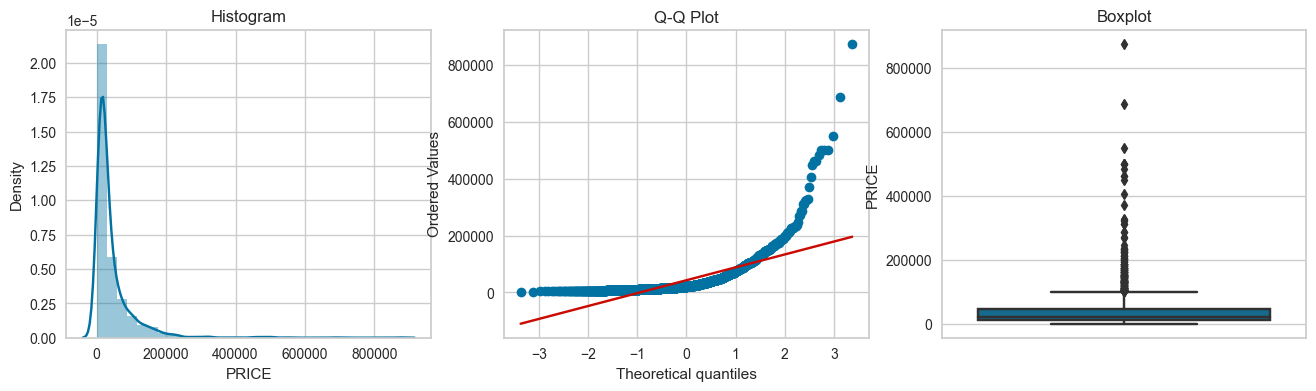

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


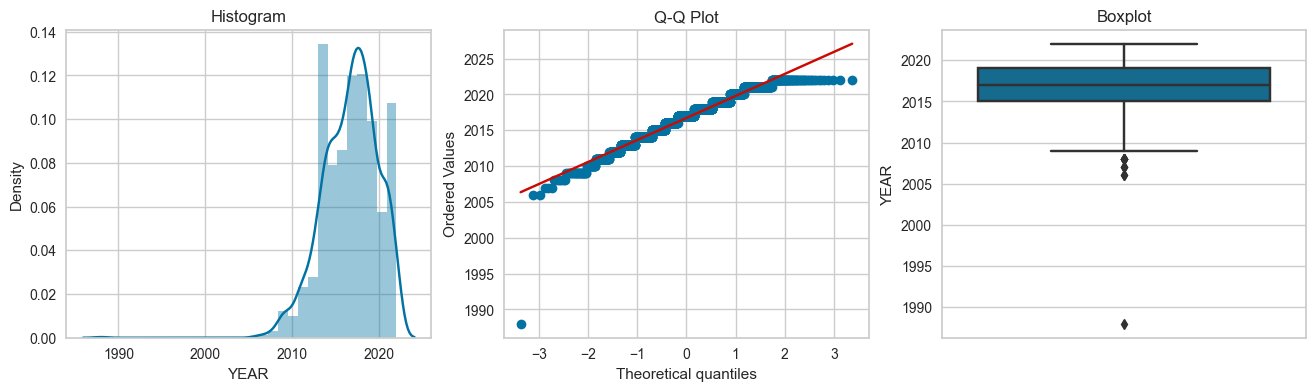

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


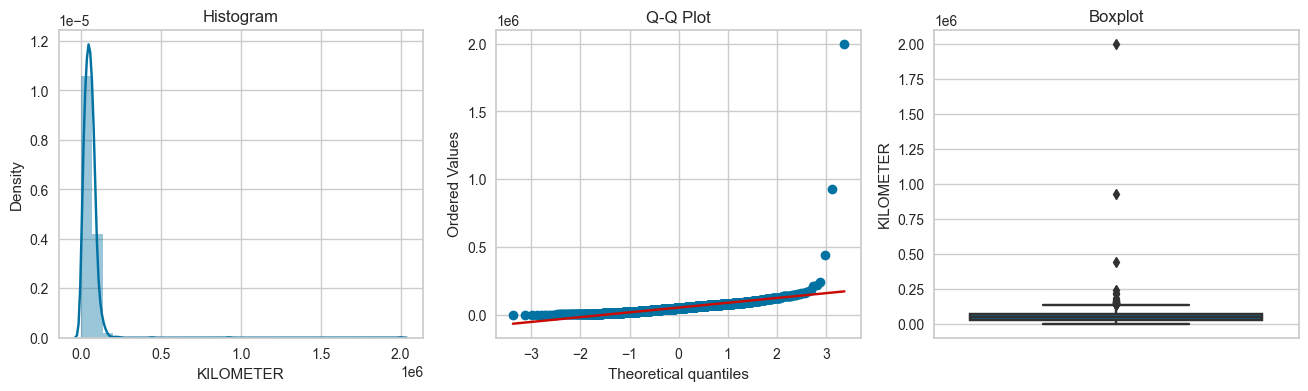

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


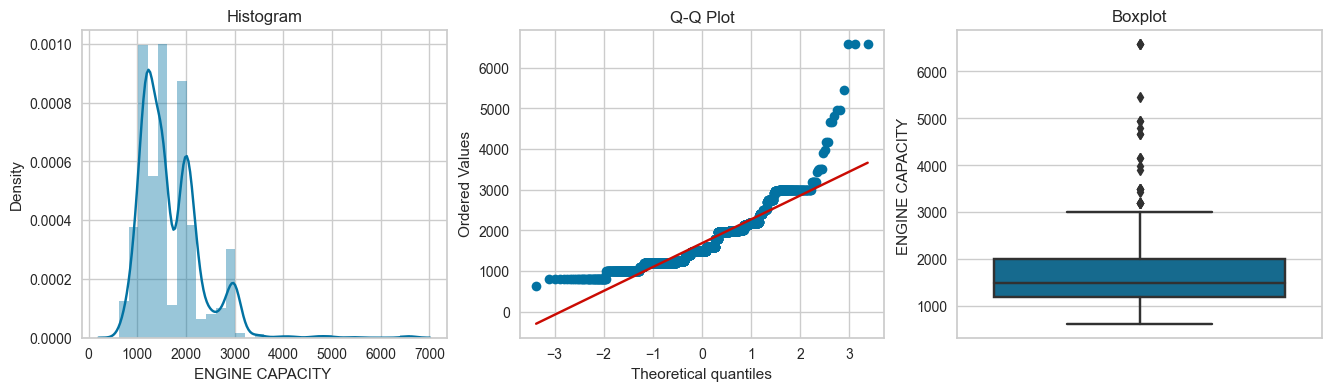

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


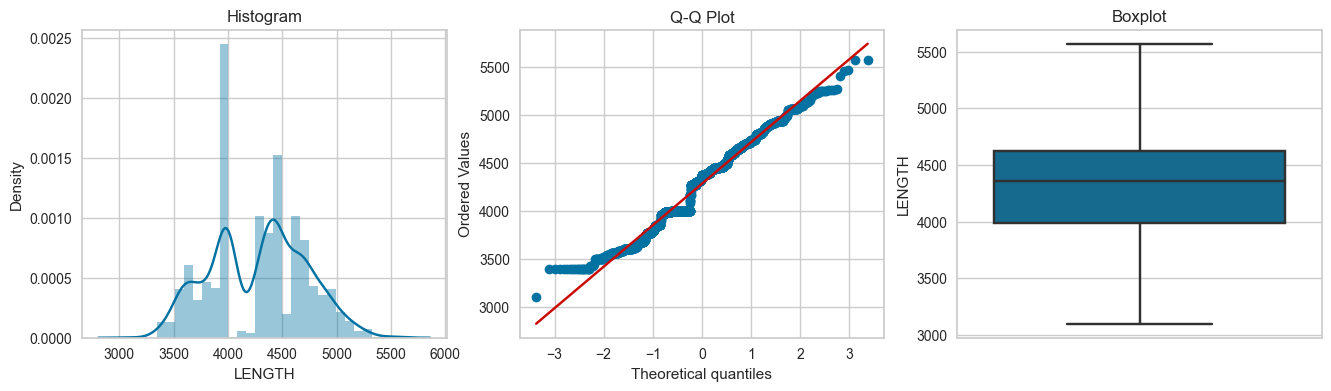

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


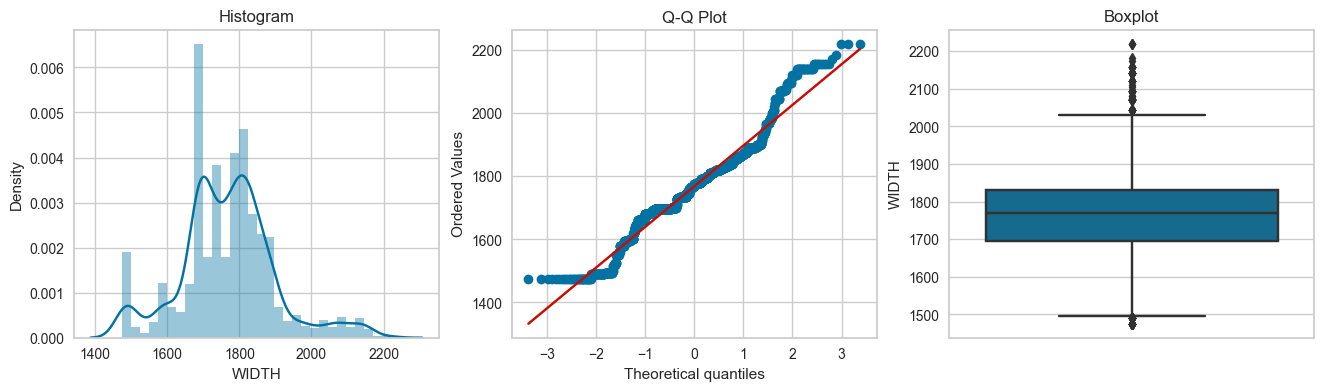

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


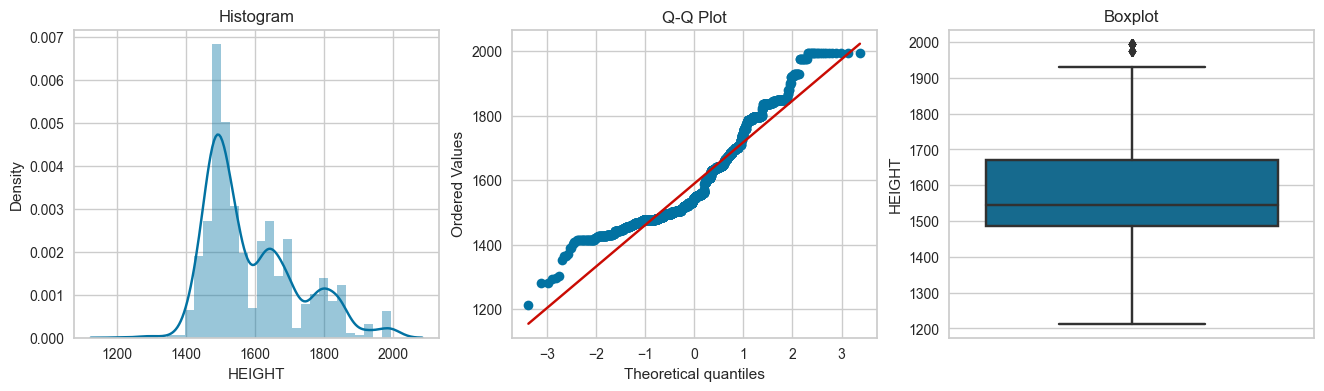

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


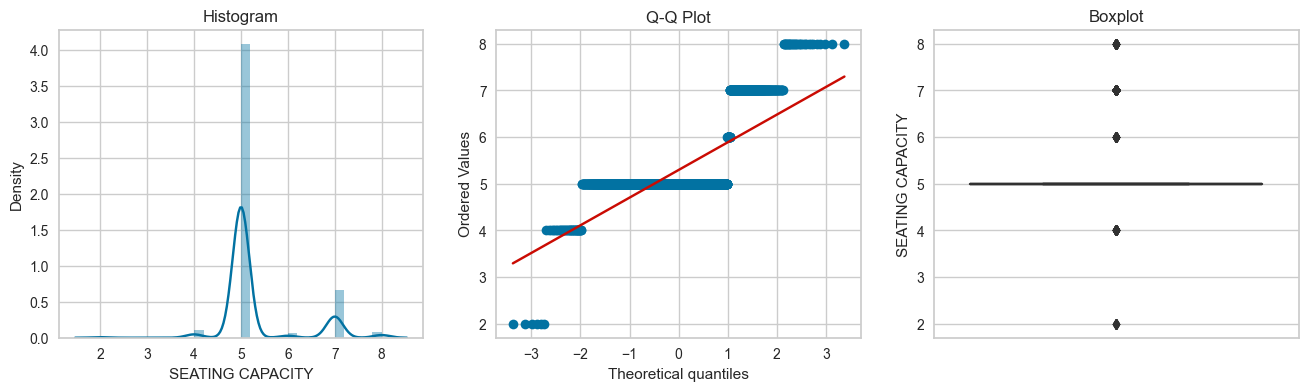

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


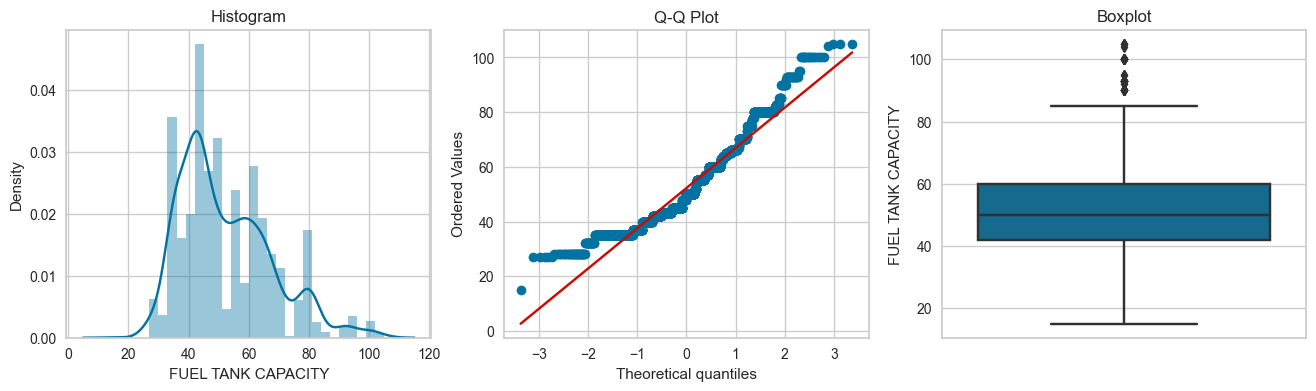

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


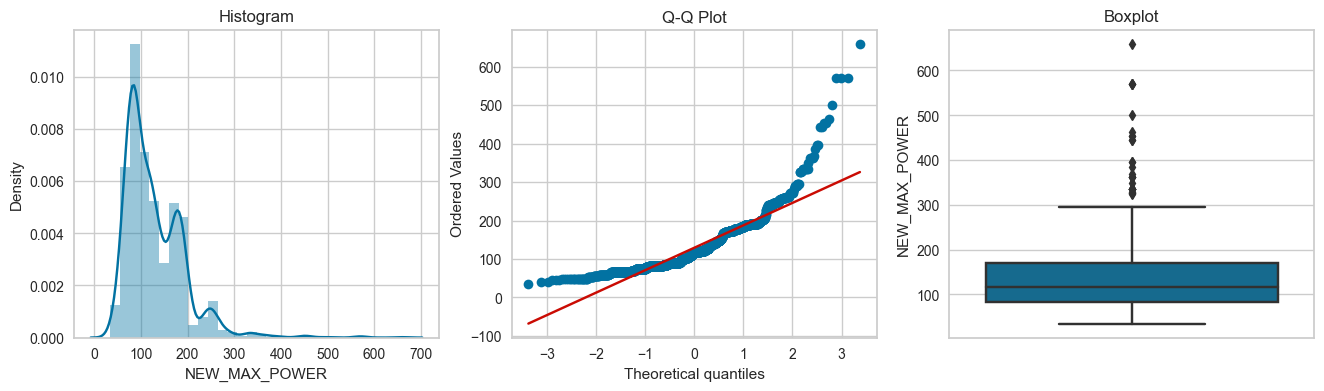

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


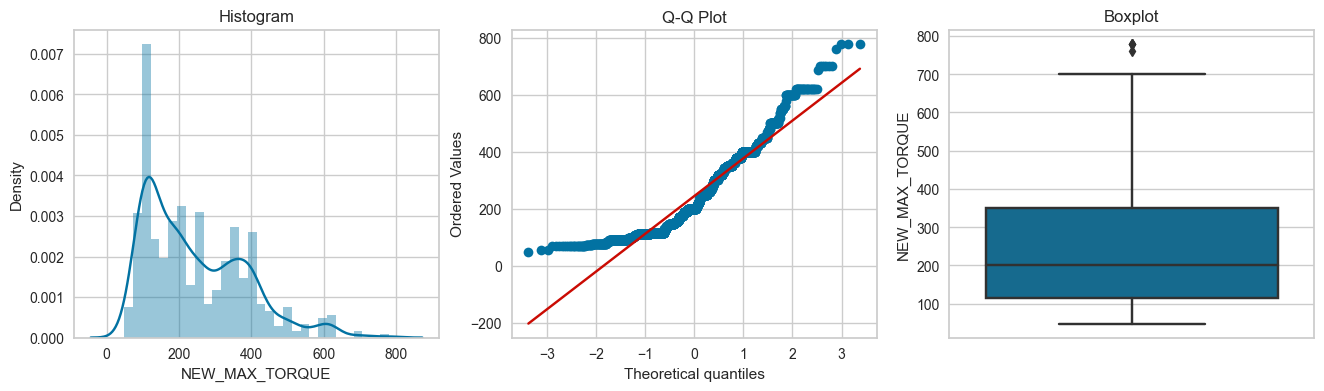

In [24]:
# check original distribution

for i in num_cols:
    diagnostic_plots(data, i)

In [25]:
num_cols

['PRICE',
 'YEAR',
 'KILOMETER',
 'ENGINE CAPACITY ',
 'LENGTH',
 'WIDTH',
 'HEIGHT',
 'SEATING CAPACITY',
 'FUEL TANK CAPACITY',
 'NEW_MAX_POWER',
 'NEW_MAX_TORQUE']

In [26]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [27]:
# find the upper and lower boudaries for the variable price, highlighting outliers

price_upper_boundary, price_lower_boundary = find_boundaries(data, 'PRICE', 1.5)
price_upper_boundary, price_lower_boundary

(100515.625, -40309.375)

In [28]:
# find the upper and lower boudaries for the variable km, highlighting outliers

km_upper_boundary, km_lower_boundary = find_boundaries(data, 'KILOMETER', 1.5)
km_upper_boundary, km_lower_boundary

(135470.375, -36450.625)

In [29]:
# find the upper and lower boudaries for the variable year, highlighting outliers

year_upper_boundary, year_lower_boundary = find_boundaries(data, 'YEAR', 1.5)
year_upper_boundary, year_lower_boundary

(2025.0, 2009.0)

In [30]:
# find the upper and lower boudaries for the variable engine capacity, highlighting outliers

ec_upper_boundary, ec_lower_boundary = find_boundaries(data, 'ENGINE CAPACITY ', 1.5)
ec_upper_boundary, ec_lower_boundary

(3192.0, 0.0)

In [31]:
# find the upper and lower boudaries for the variable length, highlighting outliers

length_upper_boundary, length_lower_boundary = find_boundaries(data, 'LENGTH', 1.5)
length_upper_boundary, length_lower_boundary

(5572.5, 3032.5)

In [32]:
# find the upper and lower boudaries for the variable width, highlighting outliers

width_upper_boundary, width_lower_boundary = find_boundaries(data, 'WIDTH', 1.5)
width_upper_boundary, width_lower_boundary

(2035.0, 1491.0)

In [33]:
# find the upper and lower boudaries for the variable height, highlighting outliers

height_upper_boundary, height_lower_boundary = find_boundaries(data, 'HEIGHT', 1.5)
height_upper_boundary, height_lower_boundary

(1949.375, 1206.375)

In [34]:
# find the upper and lower boudaries for the variable , highlighting outliers

sc_upper_boundary, sc_lower_boundary = find_boundaries(data, 'SEATING CAPACITY', 1.5)
sc_upper_boundary, sc_lower_boundary

(5.0, 5.0)

In [35]:
# find the upper and lower boudaries for the variable age, highlighting outliers

ftc_upper_boundary, ftc_lower_boundary = find_boundaries(data, 'FUEL TANK CAPACITY', 1.5)
ftc_upper_boundary, ftc_lower_boundary

(87.0, 15.0)

In [36]:
# find the upper and lower boudaries for the variable age, highlighting outliers

nmp_upper_boundary, nmp_lower_boundary = find_boundaries(data, 'NEW_MAX_POWER', 1.5)
nmp_upper_boundary, nmp_lower_boundary

(300.5, -47.5)

In [37]:
# find the upper and lower boudaries for the variable age, highlighting outliers

nmt_upper_boundary, nmt_lower_boundary = find_boundaries(data, 'NEW_MAX_TORQUE', 1.5)
nmt_upper_boundary, nmt_lower_boundary

(702.5, -237.5)

In [38]:
# Flag outliers in price
price_outliers = np.where(data['PRICE'] > price_upper_boundary, True,
                    np.where(data['PRICE'] < price_lower_boundary, True, False))

# Flag outliers in year
year_outliers = np.where(data['YEAR'] > year_upper_boundary, True,
                    np.where(data['YEAR'] < year_lower_boundary, True, False))

# Flag outliers in kilometer
km_outliers = np.where(data['KILOMETER'] > km_upper_boundary, True,
                    np.where(data['KILOMETER'] < km_lower_boundary, True, False))

# Flag outliers in engine capacity
ec_outliers = np.where(data['ENGINE CAPACITY '] > ec_upper_boundary, True,
                    np.where(data['ENGINE CAPACITY '] < ec_lower_boundary, True, False))

# Flag outliers in length
length_outliers = np.where(data['LENGTH'] > length_upper_boundary, True,
                    np.where(data['LENGTH'] < length_lower_boundary, True, False))

# Flag outliers in width
width_outliers = np.where(data['WIDTH'] > width_upper_boundary, True,
                    np.where(data['WIDTH'] < width_lower_boundary, True, False))

# Flag outliers in height
height_outliers = np.where(data['HEIGHT'] > height_upper_boundary, True,
                    np.where(data['HEIGHT'] < height_lower_boundary, True, False))

# Flag outliers in seating capacity
sc_outliers = np.where(data['SEATING CAPACITY'] > sc_upper_boundary, True,
                    np.where(data['SEATING CAPACITY'] < sc_lower_boundary, True, False))

# Flag outliers in fuel tank capacity
ftc_outliers = np.where(data['FUEL TANK CAPACITY'] > ftc_upper_boundary, True,
                    np.where(data['FUEL TANK CAPACITY'] < ftc_lower_boundary, True, False))

# Flag outliers in new max power
nmp_outliers = np.where(data['NEW_MAX_POWER'] > nmp_upper_boundary, True,
                    np.where(data['NEW_MAX_POWER'] < nmp_lower_boundary, True, False))

# Flag outliers in new max torque
nmt_outliers = np.where(data['NEW_MAX_TORQUE'] > nmt_upper_boundary, True,
                    np.where(data['NEW_MAX_TORQUE'] < nmt_lower_boundary, True, False))

In [39]:
# Trim the dataset by removing outliers in both age and length_of_service
data = data.loc[~(price_outliers+year_outliers+km_outliers+ec_outliers+length_outliers+
                                      width_outliers+height_outliers+sc_outliers+ftc_outliers+nmp_outliers+nmt_outliers), ] 
data.shape 

(1254, 16)

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


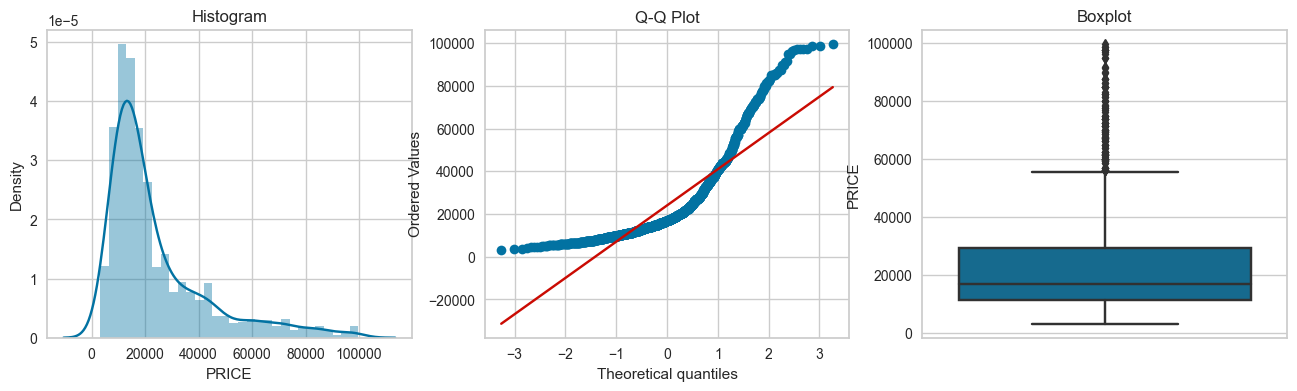

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


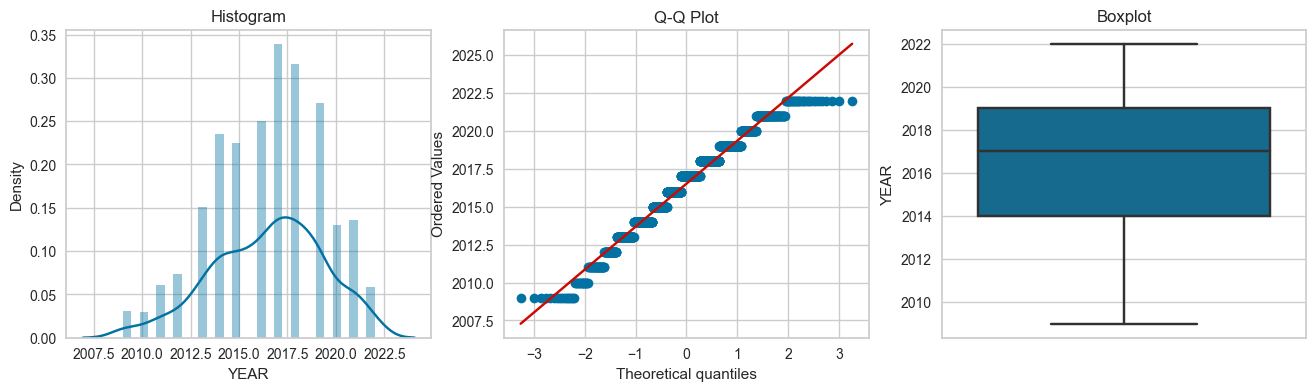

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


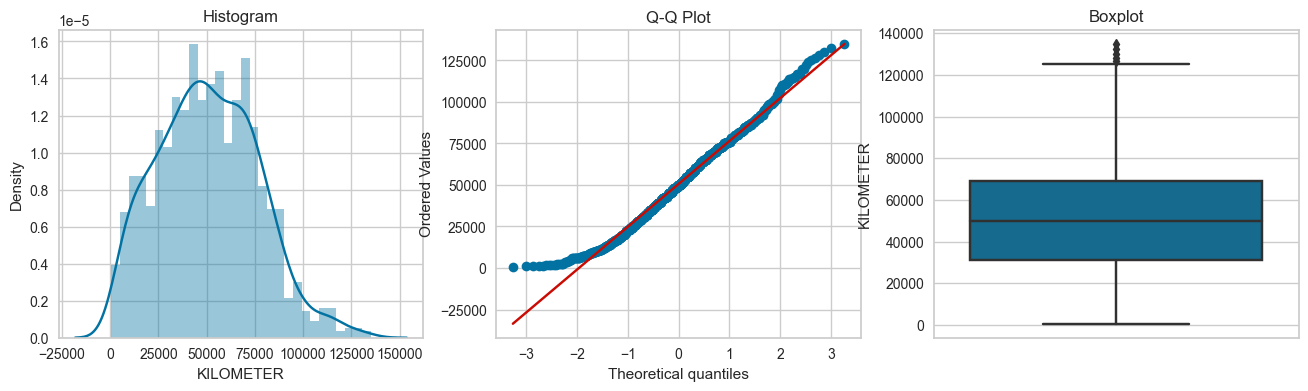

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


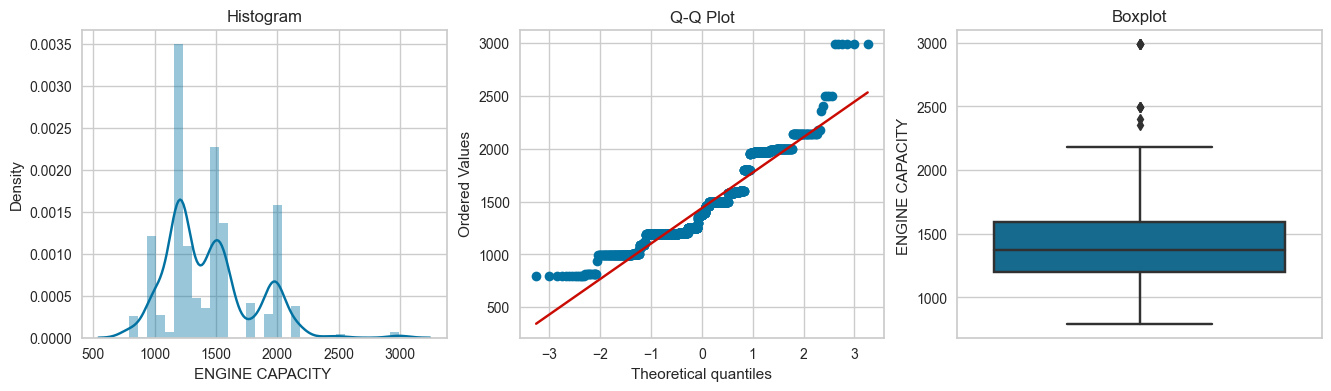

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


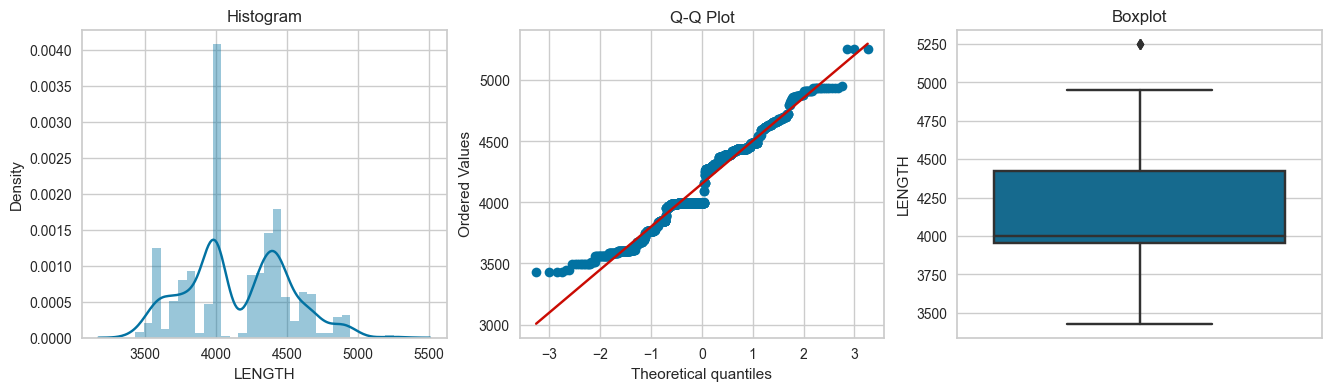

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


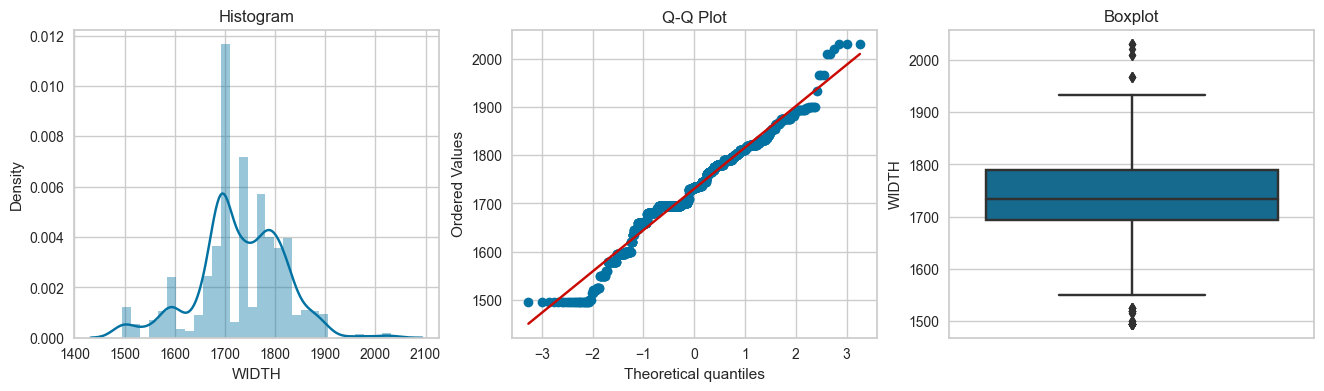

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


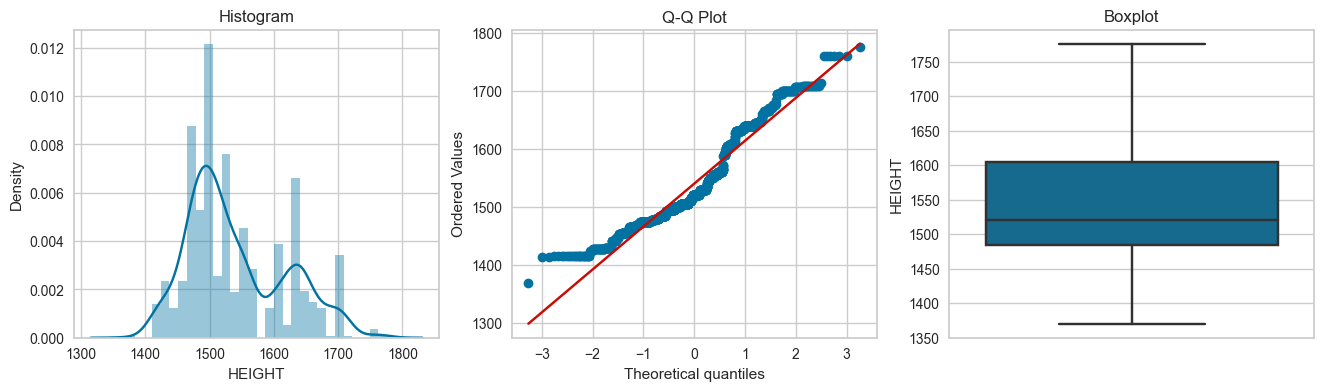

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


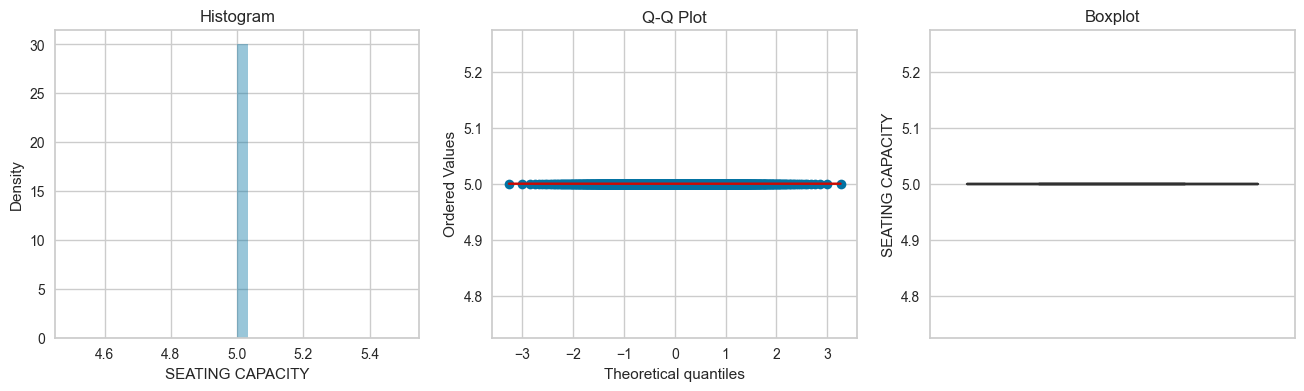

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


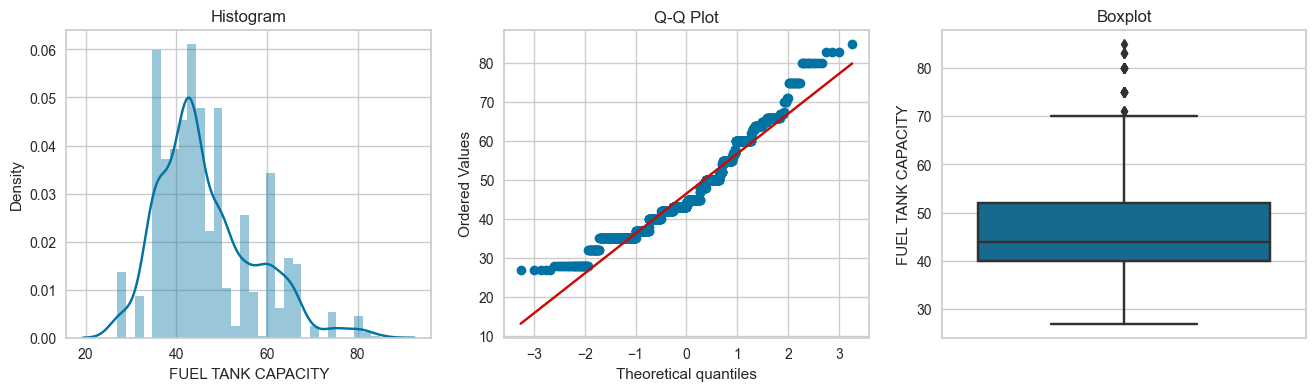

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


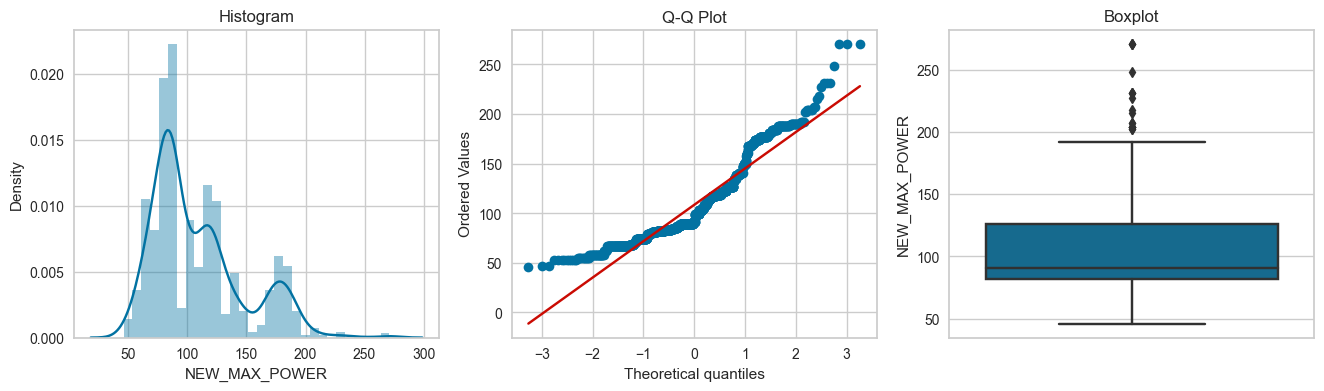

C:\Users\ambkr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


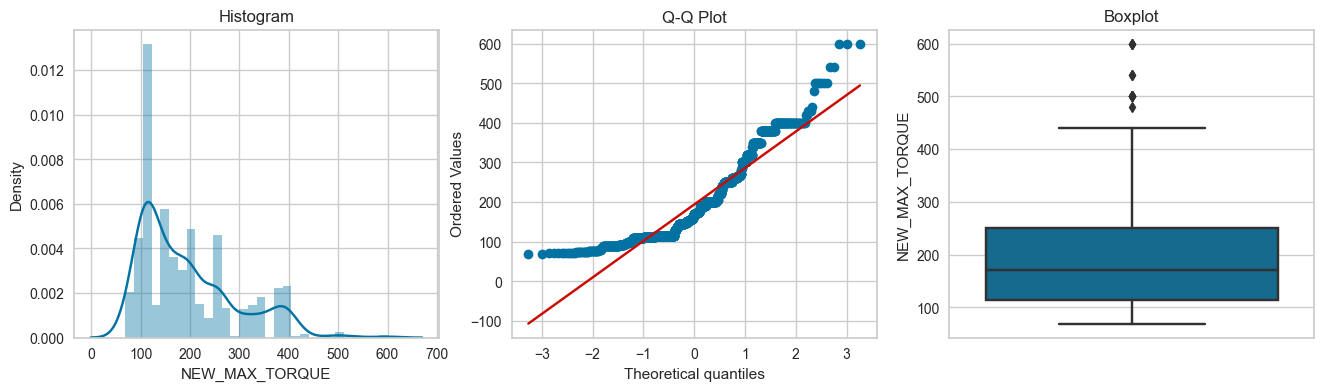

In [40]:
# check new distribution

for i in num_cols:
    diagnostic_plots(data, i)

## 1.4 Categorical Encoding<a id="part1.4"></a>
[Back to top](#top)

In [41]:
#List Categorical Variables
#Numerical Columns
cat_cols = [c for c in data.columns if data[c].dtypes =='O']
cat_cols

['FUEL TYPE', 'TRANSMISSION', 'OWNER', 'SELLER TYPE', 'DRIVETRAIN']

In [42]:
#Numerical Columns
num_cols = [c for c in data.columns if data[c].dtypes!='O']
num_cols

numerical_data = data[num_cols]

In [43]:
# Apply label encoding to the selected categorical variables
label_encoder = LabelEncoder()
for i in cat_cols:
    data[i] = label_encoder.fit_transform(data[i])

In [44]:
data.head()

PRICE  YEAR  KILOMETER  FUEL TYPE  TRANSMISSION  OWNER  SELLER TYPE  \
0  12625.0  2017      87150          3             1      0            1   
1  11250.0  2014      75000          1             1      1            2   
2   5500.0  2011      67000          3             1      0            2   
3  19975.0  2019      37500          3             1      0            2   
5  16875.0  2017      73315          3             1      0            2   

   ENGINE CAPACITY   DRIVETRAIN  LENGTH   WIDTH  HEIGHT  SEATING CAPACITY  \
0            1198.0           1  3990.0  1680.0  1505.0               5.0   
1            1248.0           1  3995.0  1695.0  1555.0               5.0   
2            1197.0           1  3585.0  1595.0  1550.0               5.0   
3            1197.0           1  3995.0  1745.0  1510.0               5.0   
5            1373.0           1  4490.0  1730.0  1485.0               5.0   

   FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  
0                35.0           87.0           109.0  
1                42.0           74.0           190.0  
2                35.0           79.0           112.0  
3                37.0           82.0           113.0  
5                43.0           91.0           130.0

In [45]:
numerical_data

PRICE  YEAR  KILOMETER  ENGINE CAPACITY   LENGTH   WIDTH  HEIGHT  \
0     12625.0  2017      87150            1198.0  3990.0  1680.0  1505.0   
1     11250.0  2014      75000            1248.0  3995.0  1695.0  1555.0   
2      5500.0  2011      67000            1197.0  3585.0  1595.0  1550.0   
3     19975.0  2019      37500            1197.0  3995.0  1745.0  1510.0   
5     16875.0  2017      73315            1373.0  4490.0  1730.0  1485.0   
...       ...   ...        ...               ...     ...     ...     ...   
2050  22275.0  2016      47000            1591.0  4270.0  1780.0  1630.0   
2051  23125.0  2021      48000            1462.0  3995.0  1790.0  1640.0   
2053   6125.0  2014      79000            1197.0  3775.0  1680.0  1620.0   
2055   6875.0  2014      83000             814.0  3495.0  1550.0  1500.0   
2056   6000.0  2013      73000            1196.0  3795.0  1680.0  1427.0   

      SEATING CAPACITY  FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  
0                  5.0                35.0           87.0           109.0  
1                  5.0                42.0           74.0           190.0  
2                  5.0                35.0           79.0           112.0  
3                  5.0                37.0           82.0           113.0  
5                  5.0                43.0           91.0           130.0  
...                ...                 ...            ...             ...  
2050               5.0                60.0          122.0           154.0  
2051               5.0                48.0          103.0           138.0  
2053               5.0                43.0           85.0           113.0  
2055               5.0                32.0           55.0            75.0  
2056               5.0                45.0           70.0           102.0  

[1254 rows x 11 columns]

## 1.5 Data Scaling<a id="part1.5"></a>
[Back to top](#top)

In [46]:
# Scaling the data so that all the features/attributes become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(numerical_data) 

In [47]:
X_scaled=pd.DataFrame(X_scaled, columns=numerical_data.columns)
X_scaled.head()

PRICE      YEAR  KILOMETER  ENGINE CAPACITY     LENGTH     WIDTH  \
0 -0.596624  0.168266   1.408173         -0.685719 -0.456286 -0.577183   
1 -0.668657 -0.881513   0.939250         -0.542861 -0.442281 -0.404197   
2 -0.969884 -1.931292   0.630494         -0.688576 -1.590703 -1.557442   
3 -0.211576  0.868119  -0.508044         -0.688576 -0.442281  0.172426   
4 -0.373977  0.168266   0.874218         -0.185715  0.944228 -0.000561   

     HEIGHT  SEATING CAPACITY  FUEL TANK CAPACITY  NEW_MAX_POWER  \
0 -0.461561               0.0           -1.094762      -0.553455   
1  0.195238               0.0           -0.429930      -0.890200   
2  0.129558               0.0           -1.094762      -0.760682   
3 -0.395881               0.0           -0.904810      -0.682972   
4 -0.724281               0.0           -0.334954      -0.449841   

   NEW_MAX_TORQUE  
0       -0.868289  
1       -0.039056  
2       -0.837577  
3       -0.827340  
4       -0.653303

# 2. K-Means Clustering <a id="part2"></a>
[Back to top](#top)

## 2.1 Build Clustering Model <a id="part2.1"></a>
[Back to top](#top)

### 2.1.1 Build & Fit the Model <a id="part2.1.1"></a>
[Back to top](#top)

In [48]:
# Build a K-means clustering model
kmeans = KMeans(n_clusters=3, n_init=20, max_iter=300, random_state=1)
# n_clusters: number of clusters
# n_init: Number of time the k-means algorithm will be run with different centroid seeds.
# max_iter: Maximum number of iterations of the k-means algorithm for a single run

In [49]:
# Fit the Model on our dataset
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=20, random_state=1)

### 2.1.2 View Coordinates of Cluster Centers <a id="part2.1.2"></a>
[Back to top](#top)

In [50]:
# View the Coordinates of cluster centers (i.e. the centroids)
kmeans.cluster_centers_

array([[ 1.5800916 , -0.07138943,  0.08269555,  1.64285546,  1.30139475,
         1.24610638, -0.28477746,  0.        ,  1.40634118,  1.70482855,
         1.65997414],
       [-0.11756304,  0.07935032,  0.12694463,  0.08256492,  0.36022516,
         0.22923723,  0.23461916,  0.        ,  0.11754523,  0.03972458,
         0.02889319],
       [-0.60358151, -0.04115961, -0.15460326, -0.81683955, -0.91954891,
        -0.77356266, -0.08847938,  0.        , -0.74255923, -0.80517953,
        -0.77495024]])

### 2.1.3 Assigning of Objects to the cluster represented by its nearest centroid <a id="part2.1.3"></a>
[Back to top](#top)

In [51]:
# Assign each data object/point to the cluster represented by its nearest centroid
y_pred = kmeans.predict(X_scaled)

In [52]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## 2.2 Visualising the Cluster <a id="part2.2"></a>
[Back to top](#top)

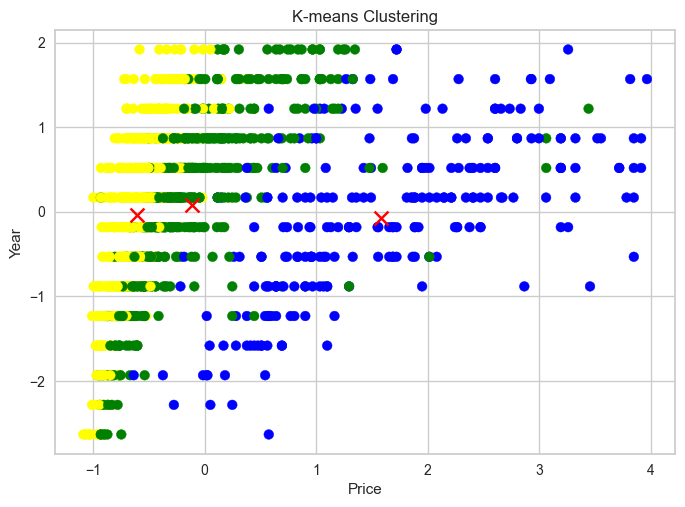

In [53]:
# Visualise the Clusters and their corresponding centroids in the below graph
# Assign colors to each cluster
colors = ['blue', 'green', 'yellow']  # Specify colors for each cluster

plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=[colors[label] for label in labels])
plt.scatter(centroids[0:, 0], centroids[0:, 1], marker='x', color='red', s=100)
plt.xlabel('Price')
plt.ylabel('Year')
plt.title('K-means Clustering')
plt.show()

In [54]:
# Evalute the model using Sum of Squared Errors (SSE) 
kmeans.inertia_

6270.37405445045

## 2.3 Elbow Method <a id="part2.3"></a>
[Back to top](#top)

C:\Users\ambkr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


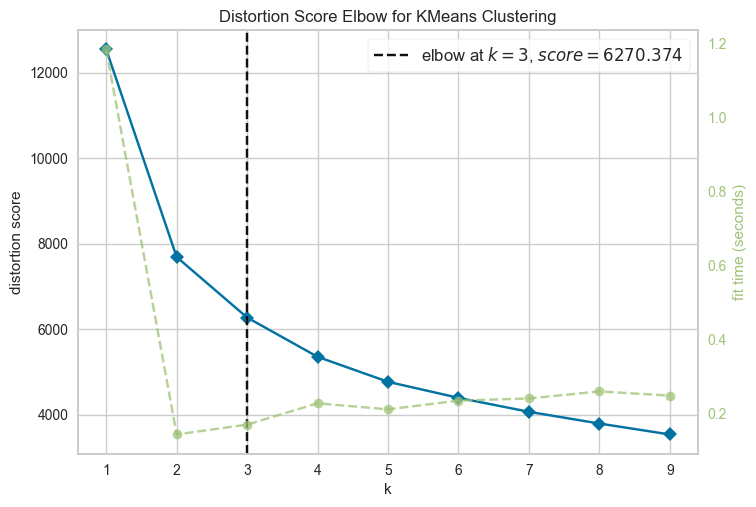

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=i, n_init=20, random_state=1)
visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Number of clusters: 2, Silhouette Score: 0.3908624532726891
Number of clusters: 3, Silhouette Score: 0.23838939261241265
Number of clusters: 4, Silhouette Score: 0.2533909804432042
Number of clusters: 5, Silhouette Score: 0.2393481889634969


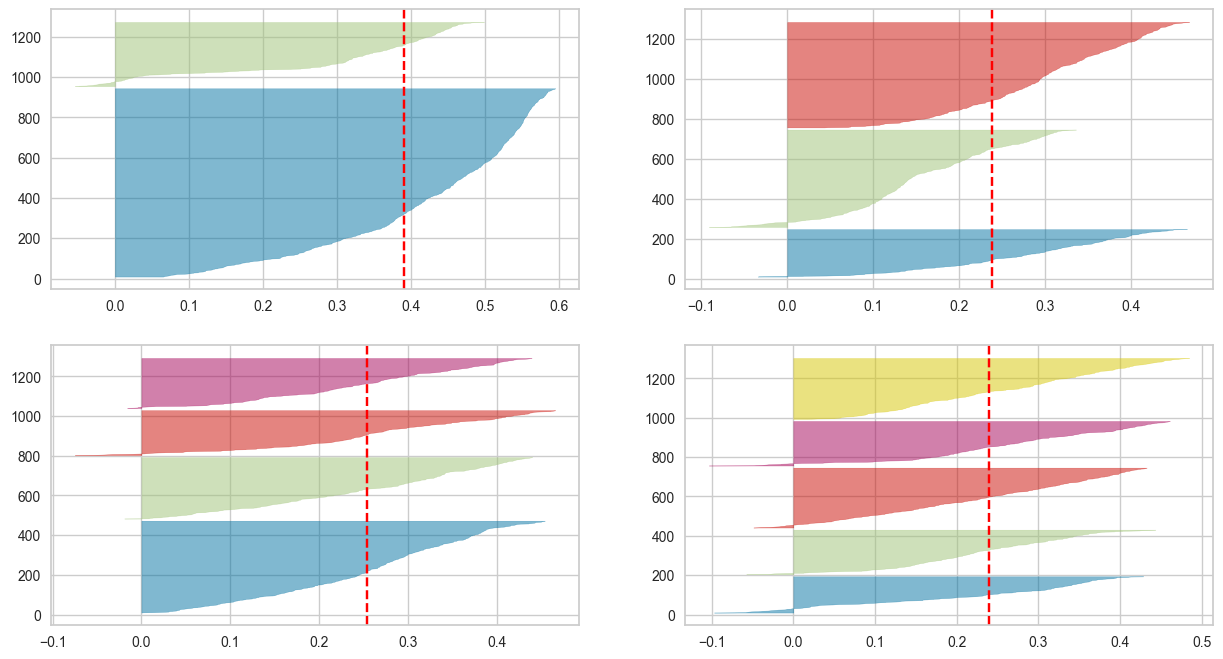

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=20, random_state=1)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaled)
    
    # Calculate the silhouette score
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    
    # Print the silhouette score
    print(f"Number of clusters: {i}, Silhouette Score: {score}")
    

## 2.4 Optimise Cluster<a id="part2.4"></a>
[Back to top](#top)

In [57]:
# Build the model using the optimal n_cluster
kmeans = KMeans(n_clusters=3, n_init=20, random_state=1)
# Fit the model and assign each data point to the cluster
y_pred = kmeans.fit_predict(X_scaled) # fit and then predict

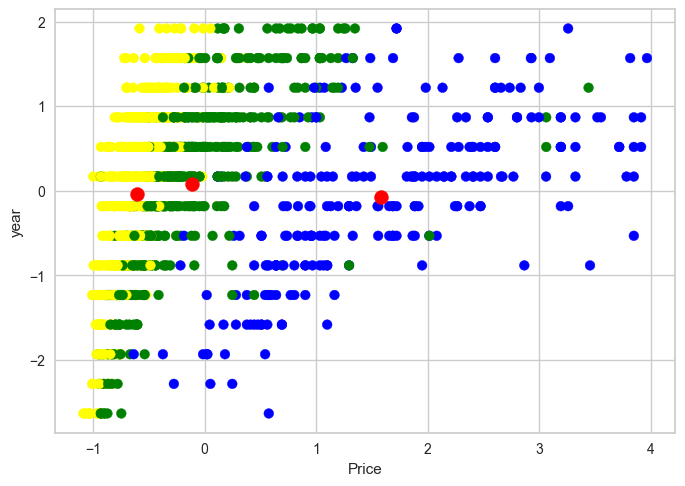

In [58]:
# Assign colors to each cluster
colors = ['blue', 'green', 'yellow']  # Specify colors for each cluster


plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=[colors[label] for label in y_pred])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Price')
plt.ylabel('year')

# Calculate the silhouette score
score = silhouette_score(X_scaled, y_pred)

plt.show()

In [59]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

## 2.5 Cluster Analysis<a id="part2.5"></a>
[Back to top](#top)

In [60]:
#Create a copy of the original dataframe to assign clusters to each car
km_df=data.copy()



km_df['cluster_'] = y_pred
km_df.head(10)



PRICE  YEAR  KILOMETER  FUEL TYPE  TRANSMISSION  OWNER  SELLER TYPE  \
0   12625.0  2017      87150          3             1      0            1   
1   11250.0  2014      75000          1             1      1            2   
2    5500.0  2011      67000          3             1      0            2   
3   19975.0  2019      37500          3             1      0            2   
5   16875.0  2017      73315          3             1      0            2   
7   66250.0  2017      75000          1             0      1            2   
8   34750.0  2017      56000          3             0      0            2   
9   14375.0  2015      85000          1             1      0            2   
10  14775.0  2017      20281          3             1      0            2   
11  11500.0  2018      22541          3             1      0            2   

    ENGINE CAPACITY   DRIVETRAIN  LENGTH   WIDTH  HEIGHT  SEATING CAPACITY  \
0             1198.0           1  3990.0  1680.0  1505.0               5.0   
1             1248.0           1  3995.0  1695.0  1555.0               5.0   
2             1197.0           1  3585.0  1595.0  1550.0               5.0   
3             1197.0           1  3995.0  1745.0  1510.0               5.0   
5             1373.0           1  4490.0  1730.0  1485.0               5.0   
7             1995.0           0  4439.0  1821.0  1612.0               5.0   
8             1798.0           1  4670.0  1814.0  1476.0               5.0   
9             1461.0           1  4331.0  1822.0  1671.0               5.0   
10            1197.0           1  3985.0  1734.0  1505.0               5.0   
11             999.0           1  3679.0  1579.0  1478.0               5.0   

    FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  cluster_  
0                 35.0           87.0           109.0         2  
1                 42.0           74.0           190.0         2  
2                 35.0           79.0           112.0         2  
3                 37.0           82.0           113.0         2  
5                 43.0           91.0           130.0         1  
7                 51.0          188.0           400.0         0  
8                 50.0          177.0           250.0         0  
9                 50.0           84.0           200.0         1  
10                45.0           82.0           115.0         2  
11                28.0           67.0            91.0         2

In [61]:
kmeans_cluster_avg = km_df.groupby("cluster_").mean()
kmeans_cluster_avg

PRICE         YEAR     KILOMETER  FUEL TYPE  TRANSMISSION  \
cluster_                                                                     
0         54175.315126  2016.315126  52806.310924   1.411765      0.067227   
1         21769.569672  2016.745902  53952.823770   1.971311      0.717213   
2         12492.187500  2016.401515  46657.795455   2.541667      0.803030   

             OWNER  SELLER TYPE  ENGINE CAPACITY   DRIVETRAIN       LENGTH  \
cluster_                                                                     
0         0.302521     1.970588       2012.995798    1.029412  4617.512605   
1         0.165984     1.967213       1466.897541    1.000000  4281.504098   
2         0.159091     1.975379       1152.107955    1.000000  3824.609848   

                WIDTH       HEIGHT  SEATING CAPACITY  FUEL TANK CAPACITY  \
cluster_                                                                   
0         1838.100840  1518.457983               5.0           61.334034   
1         1749.926230  1557.997951               5.0           47.764344   
2         1662.971591  1533.401515               5.0           38.708333   

          NEW_MAX_POWER  NEW_MAX_TORQUE  
cluster_                                 
0            174.180672      355.962185  
1            109.899590      196.637295  
2             77.282197      118.117424

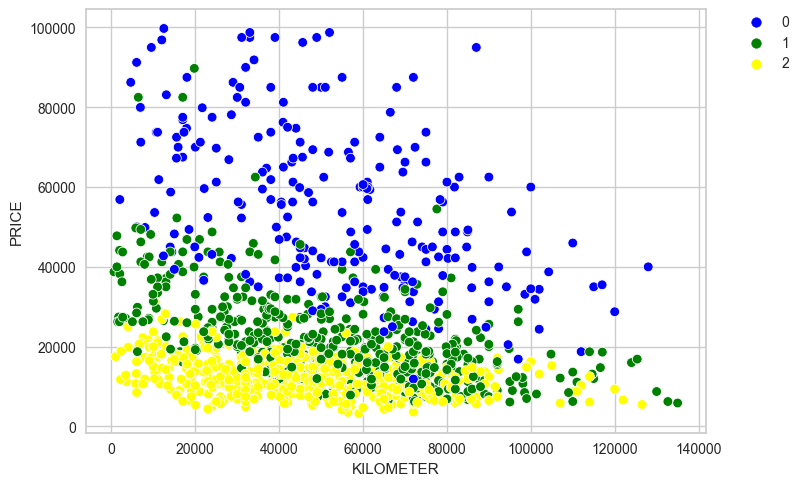

In [62]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='KILOMETER', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

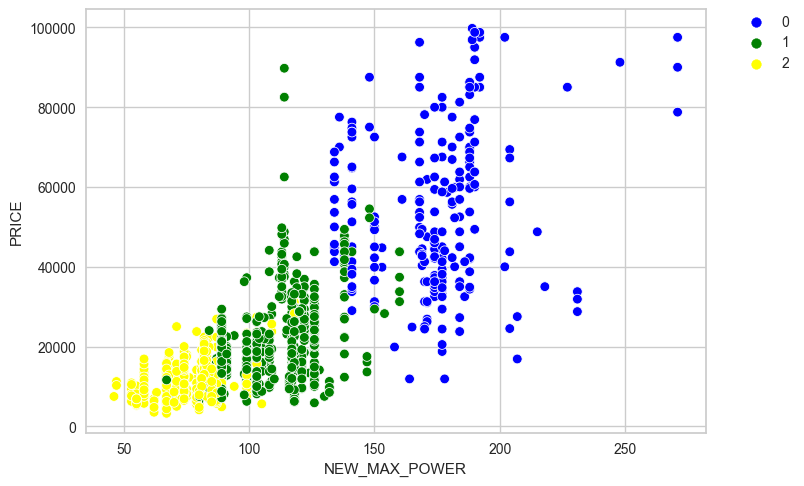

In [63]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='NEW_MAX_POWER', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

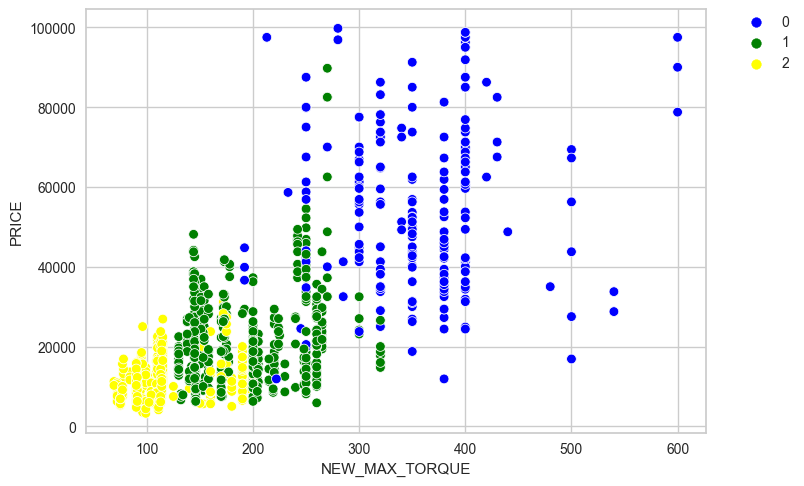

In [64]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='NEW_MAX_TORQUE', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

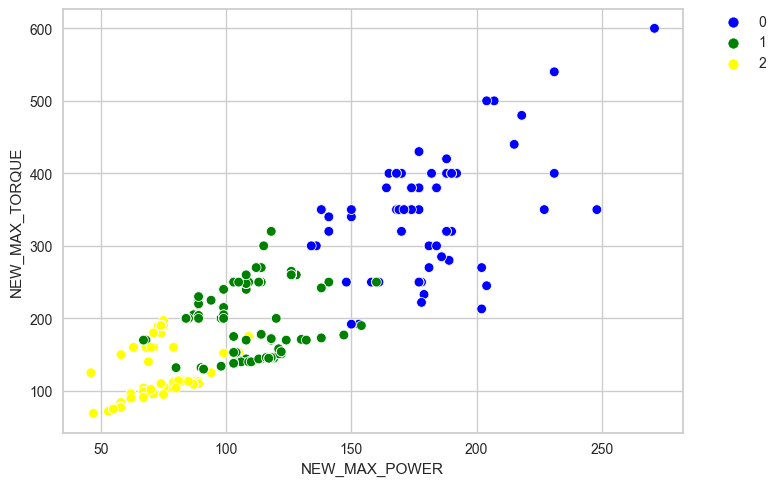

In [65]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='NEW_MAX_POWER', y='NEW_MAX_TORQUE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

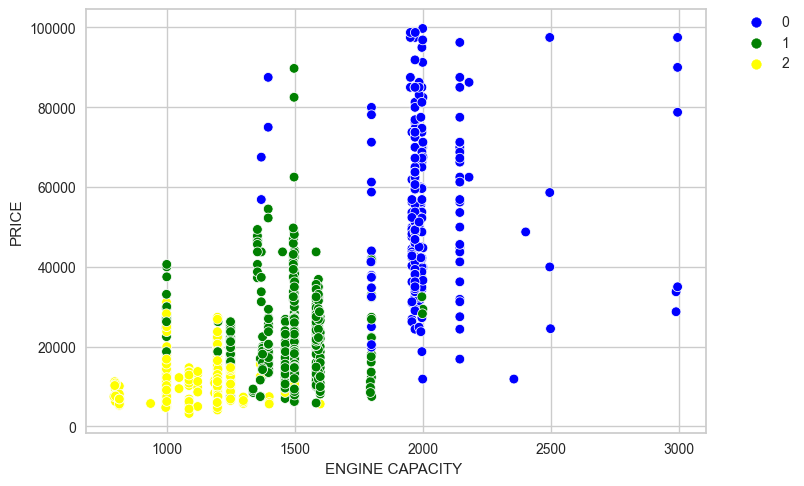

In [66]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='ENGINE CAPACITY ', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

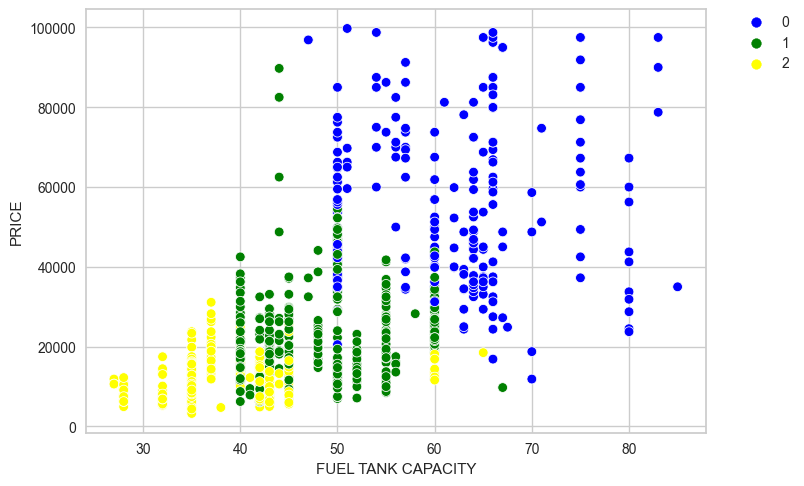

In [67]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='FUEL TANK CAPACITY', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

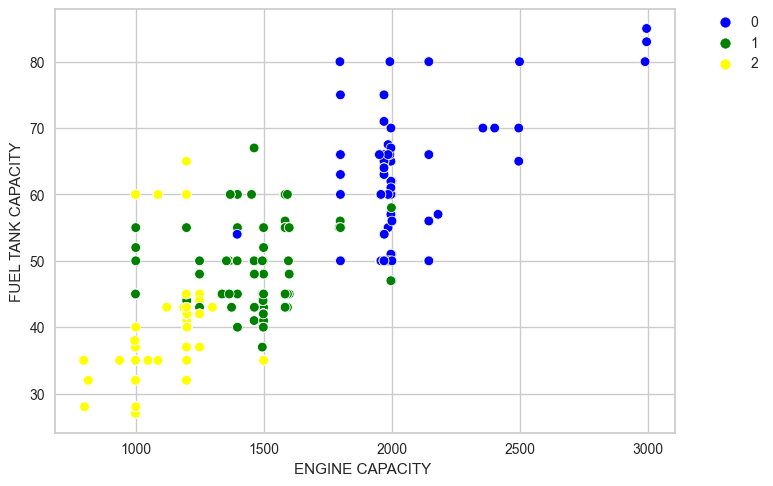

In [68]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='ENGINE CAPACITY ', y='FUEL TANK CAPACITY', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

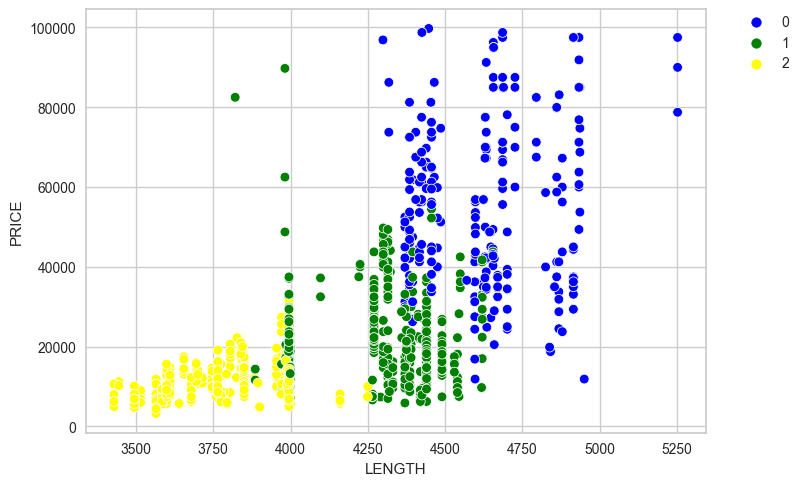

In [69]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='LENGTH', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

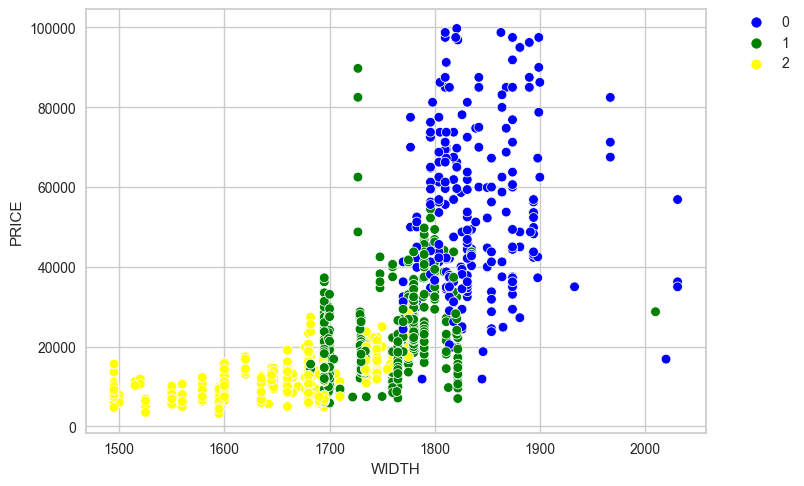

In [70]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='WIDTH', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

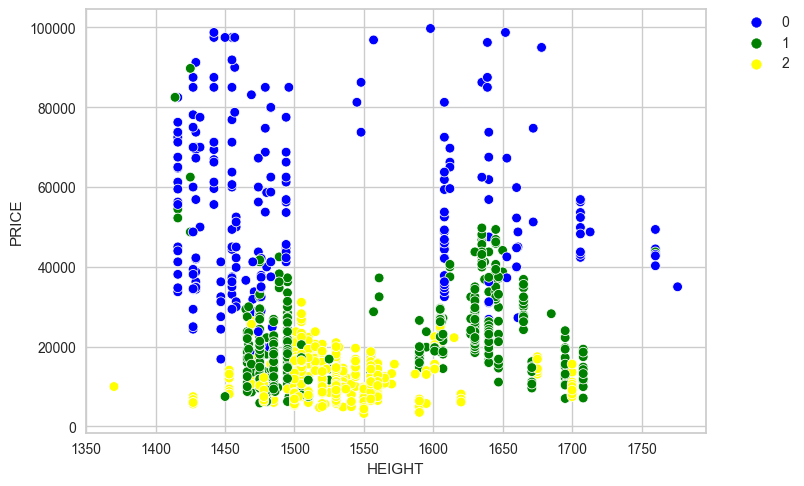

In [71]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='HEIGHT', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

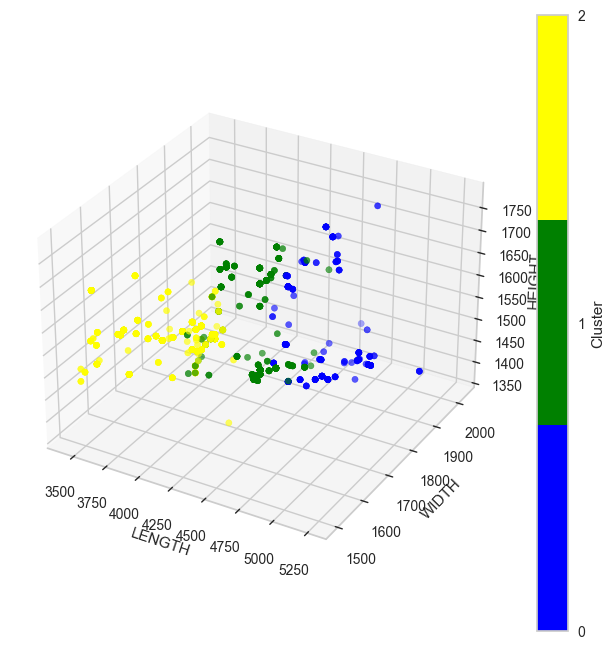

In [72]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = km_df['LENGTH']
y = km_df['WIDTH']
z = km_df['HEIGHT']

# Define custom colors for each cluster
colors = ['blue', 'green', 'yellow']

# Create a color map using the custom colors
cmap = plt.cm.colors.ListedColormap(colors)

scatter = ax.scatter(x, y, z, c=y_pred, marker='o', cmap=cmap)

ax.set_xlabel('LENGTH')
ax.set_ylabel('WIDTH')
ax.set_zlabel('HEIGHT')

# Add a colorbar
cbar = plt.colorbar(scatter, ticks=np.unique(y_pred))
cbar.set_label('Cluster')

plt.show()


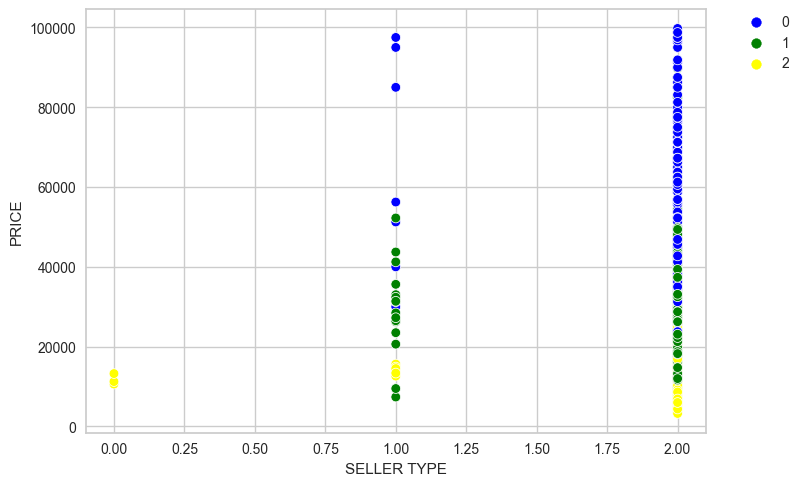

In [73]:
colors = ['blue', 'green', 'yellow']

sns.scatterplot(x='SELLER TYPE', y='PRICE', data=km_df, hue=y_pred, palette=colors)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [74]:
# Number of values in each cluster
cluster_counts = km_df['cluster_'].value_counts()

print(cluster_counts)

2    528
1    488
0    238
Name: cluster_, dtype: int64


In [75]:
# exploring some of the vehicles in each cluster

print("cluster: 0")
display(km_df[km_df["cluster_"] == 0].head())
print("cluster: 1")
display(km_df[km_df["cluster_"] == 1].head())
print("cluster: 2")
display(km_df[km_df["cluster_"] == 2].head())

cluster: 0


PRICE  YEAR  KILOMETER  FUEL TYPE  TRANSMISSION  OWNER  SELLER TYPE  \
7   66250.0  2017      75000          1             0      1            2   
8   34750.0  2017      56000          3             0      0            2   
13  42375.0  2019      20856          1             1      0            2   
38  96250.0  2017      45600          1             0      1            2   
42  39375.0  2013      66000          1             0      0            2   

    ENGINE CAPACITY   DRIVETRAIN  LENGTH   WIDTH  HEIGHT  SEATING CAPACITY  \
7             1995.0           0  4439.0  1821.0  1612.0               5.0   
8             1798.0           1  4670.0  1814.0  1476.0               5.0   
13            1956.0           1  4598.0  1894.0  1706.0               5.0   
38            2143.0           0  4656.0  1890.0  1639.0               5.0   
42            1968.0           1  4701.0  1826.0  1427.0               5.0   

    FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  cluster_  
7                 51.0          188.0           400.0         0  
8                 50.0          177.0           250.0         0  
13                50.0          138.0           350.0         0  
38                66.0          168.0           400.0         0  
42                63.0          177.0           380.0         0

cluster: 1


PRICE  YEAR  KILOMETER  FUEL TYPE  TRANSMISSION  OWNER  SELLER TYPE  \
5   16875.0  2017      73315          3             1      0            2   
9   14375.0  2015      85000          1             1      0            2   
12  26875.0  2019      30672          3             0      0            2   
19  18500.0  2016      60125          3             1      0            2   
21  19125.0  2015      60240          3             0      0            2   

    ENGINE CAPACITY   DRIVETRAIN  LENGTH   WIDTH  HEIGHT  SEATING CAPACITY  \
5             1373.0           1  4490.0  1730.0  1485.0               5.0   
9             1461.0           1  4331.0  1822.0  1671.0               5.0   
12            1462.0           1  4490.0  1730.0  1485.0               5.0   
19            1591.0           1  4270.0  1780.0  1630.0               5.0   
21            1197.0           1  4384.0  1699.0  1466.0               5.0   

    FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  cluster_  
5                 43.0           91.0           130.0         1  
9                 50.0           84.0           200.0         1  
12                43.0          103.0           138.0         1  
19                60.0          122.0           154.0         1  
21                55.0          103.0           153.0         1

cluster: 2


PRICE  YEAR  KILOMETER  FUEL TYPE  TRANSMISSION  OWNER  SELLER TYPE  \
0   12625.0  2017      87150          3             1      0            1   
1   11250.0  2014      75000          1             1      1            2   
2    5500.0  2011      67000          3             1      0            2   
3   19975.0  2019      37500          3             1      0            2   
10  14775.0  2017      20281          3             1      0            2   

    ENGINE CAPACITY   DRIVETRAIN  LENGTH   WIDTH  HEIGHT  SEATING CAPACITY  \
0             1198.0           1  3990.0  1680.0  1505.0               5.0   
1             1248.0           1  3995.0  1695.0  1555.0               5.0   
2             1197.0           1  3585.0  1595.0  1550.0               5.0   
3             1197.0           1  3995.0  1745.0  1510.0               5.0   
10            1197.0           1  3985.0  1734.0  1505.0               5.0   

    FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  cluster_  
0                 35.0           87.0           109.0         2  
1                 42.0           74.0           190.0         2  
2                 35.0           79.0           112.0         2  
3                 37.0           82.0           113.0         2  
10                45.0           82.0           115.0         2

### Cluster 0: SUV Cars

### Cluster 1: Sedan Cars

### Cluster 2: Hatchback Cars

## 2.6 Evaluate Model<a id="part2.6"></a>
[Back to top](#top)

In [76]:
print(kmeans.inertia_)
print(score)

6270.37405445045
0.23838939261241265


# 3. Hierarchical Clustering<a id="part3"></a>
[Back to top](#top)

## 3.1 Build Clustering Model<a id="part3.1"></a>
[Back to top](#top)

### 3.1.1 Generate Distance Matrix<a id="part3.1.1"></a>
[Back to top](#top)

In [77]:
# The full distance matrix 
print(cdist(X_scaled, X_scaled))

[[0.         1.74701365 2.79166229 ... 2.13150329 2.73605132 2.1970787 ]
 [1.74701365 0.         2.24920243 ... 1.40265917 3.08147564 2.07377455]
 [2.79166229 2.24920243 0.         ... 2.00220502 2.01529935 2.32990667]
 ...
 [2.13150329 1.40265917 2.00220502 ... 0.         2.90122433 2.60892121]
 [2.73605132 3.08147564 2.01529935 ... 2.90122433 0.         2.66268349]
 [2.1970787  2.07377455 2.32990667 ... 2.60892121 2.66268349 0.        ]]


In [78]:
help(shc.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

### 3.1.2 Perform Agglomerative Clustering and Generate Dendogram<a id="part3.1.2"></a>
[Back to top](#top)

In [79]:
# Perform hierarchical/agglomerative clustering
Z = shc.linkage(X_scaled, method ='average') 
Z # A condensed distance matrix

array([[6.00000000e+00, 1.12700000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.62000000e+02, 7.45000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.78000000e+02, 9.53000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [5.22000000e+02, 2.50000000e+03, 5.62658818e+00, 6.00000000e+00],
       [2.50200000e+03, 2.50300000e+03, 5.71978854e+00, 1.24800000e+03],
       [2.50400000e+03, 2.50500000e+03, 9.43848133e+00, 1.25400000e+03]])

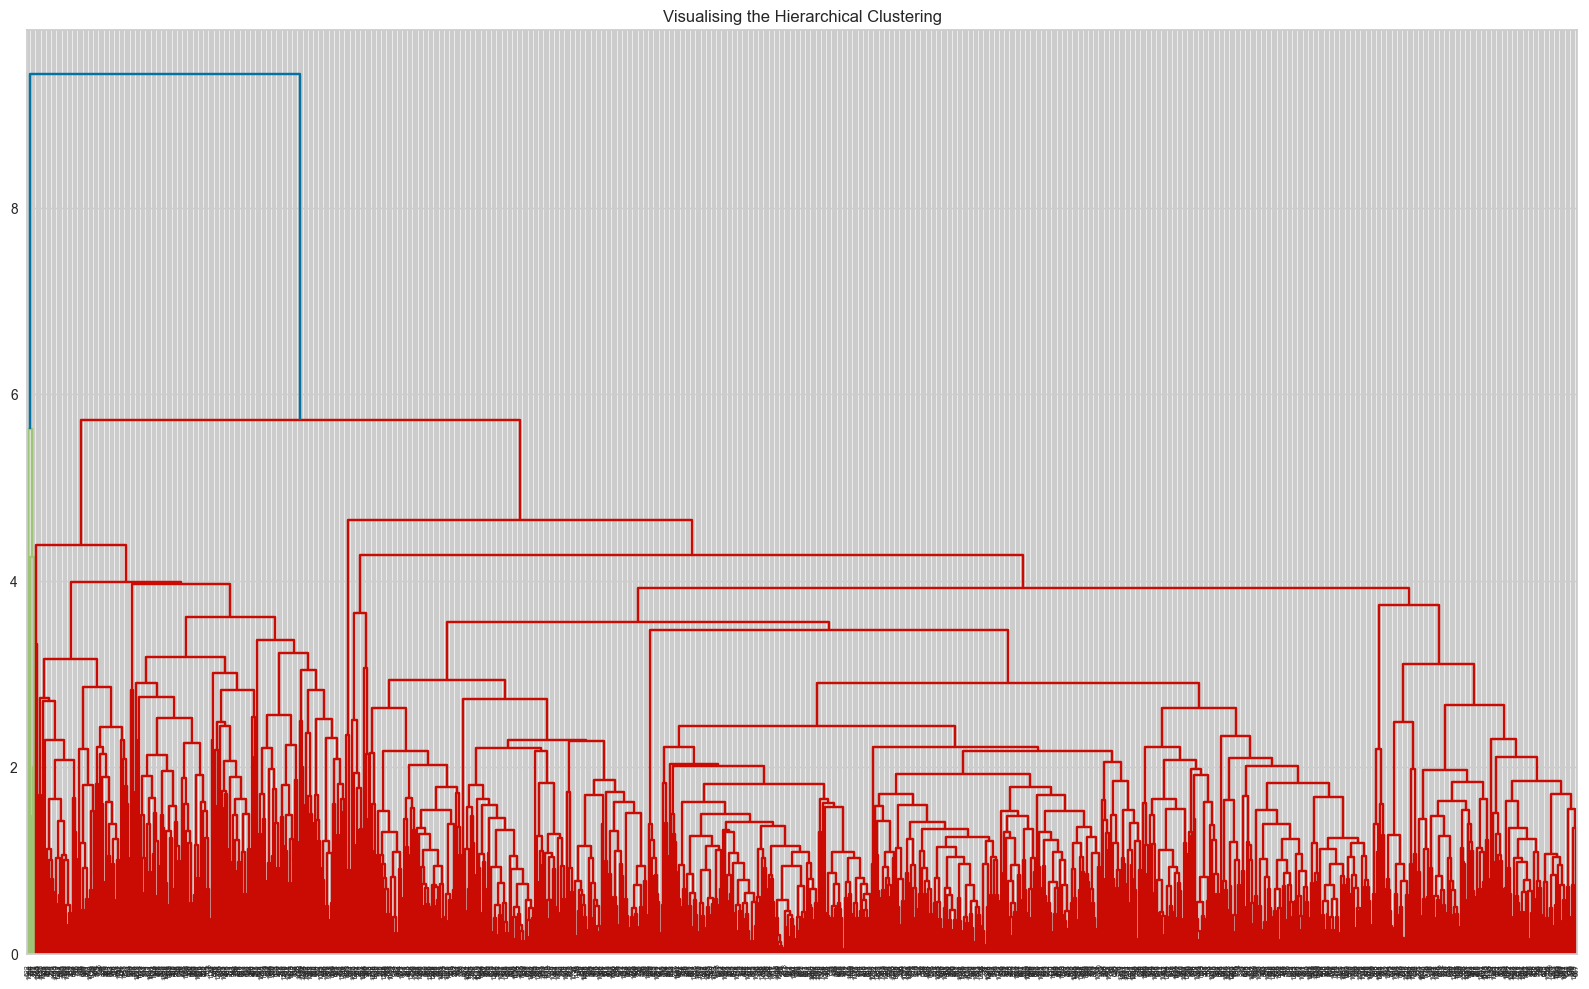

In [80]:
# Visualizing the hierarchical clustering through Dendrograms
plt.figure(figsize =(20, 12)) 
plt.title('Visualising the Hierarchical Clustering') 
Dendrogram = shc.dendrogram(Z)

### 3.1.3 Build & Fit the Model<a id="part3.1.3"></a>
[Back to top](#top)

In [81]:
# Build Agglomerative Clusting model with number of clusters set as 2
ac2 = AgglomerativeClustering(n_clusters = 2)
ac2

AgglomerativeClustering()

In [82]:
# Fit the model to the data and predict the clusters
y_prediction = ac2.fit_predict(X_scaled)
y_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 3.2 Visualising the Cluster<a id="part3.2"></a>
[Back to top](#top)

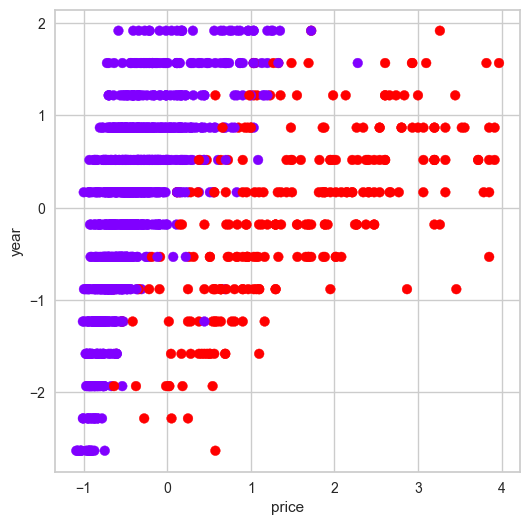

In [83]:
# Visualize the Three Clusters
plt.figure(figsize =(6, 6)) 
plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], 
            c = y_prediction, cmap ='rainbow') 
plt.xlabel('price')
plt.ylabel('year')
plt.show() 

In [84]:
ac2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
# Calculate the Silhouette Score
from sklearn.metrics import silhouette_score 
silhouette_score(X_scaled, ac2.labels_)

0.41344229830939805

## 3.3 Improve & Evaluate the Model<a id="part3.3"></a>
[Back to top](#top)

In [86]:
# We would like to evaluate the Silhouette Scores for different K, i.e. n_clusters (ranging from 2 to 11)
k_range = range(2,11)
silhouette_scores =[]

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='ward')
    silhouette_scores.append(silhouette_score(X_scaled, ac_i.fit_predict(X_scaled)))

In [87]:
silhouette_scores

[0.41344229830939805,
 0.25717447827279466,
 0.238453037333434,
 0.22282547949993367,
 0.2127063346919249,
 0.21863475522074877,
 0.19771121754316867,
 0.19550513255690324,
 0.1986712331439956]

In [88]:
# We would like to evaluate the Silhouette Scores for different K, i.e. n_clusters (ranging from 2 to 11)
k_range = range(2,11)
silhouette_scores =[]

for i in k_range:
    ac_i = AgglomerativeClustering(n_clusters = i,linkage='average')
    silhouette_scores.append(silhouette_score(X_scaled, ac_i.fit_predict(X_scaled)))

In [89]:
silhouette_scores

[0.5350636860015746,
 0.3994191882282037,
 0.3959982785551326,
 0.27860611849491695,
 0.21226095116793675,
 0.15379115074974506,
 0.15255221221017146,
 0.16099367651316224,
 0.1554809398526809]

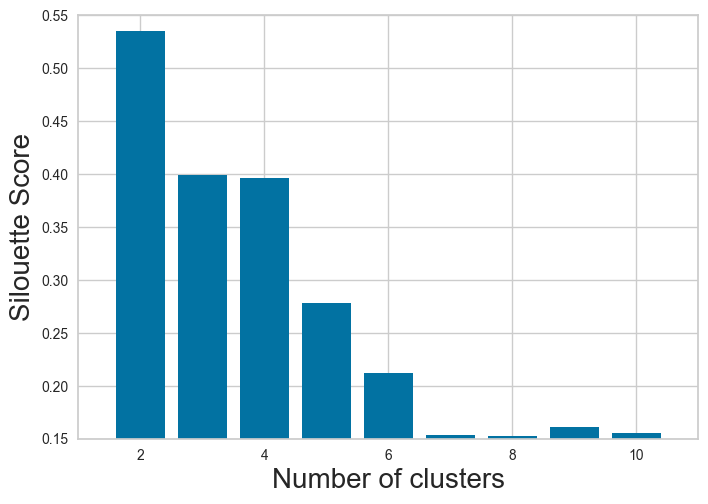

In [90]:
# Plotting Silhouette Scores using a bar graph to compare the results 
plt.bar(k_range, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('Silouette Score', fontsize = 20)
plt.axis([1, 11, 0.15, 0.55])
plt.show() 

In [91]:
# Calculate the Silhouette Score
from sklearn.metrics import silhouette_score 
silhouette_score(X_scaled, y_prediction)

0.41344229830939805

## 3.4 Cluster Analysis<a id="part3.4"></a>
[Back to top](#top)

In [92]:
#Create a copy of the original dataframe to assign clusters to each car
ag_df=data.copy()



ag_df['cluster_'] = y_prediction
ag_df.head(10)



PRICE  YEAR  KILOMETER  FUEL TYPE  TRANSMISSION  OWNER  SELLER TYPE  \
0   12625.0  2017      87150          3             1      0            1   
1   11250.0  2014      75000          1             1      1            2   
2    5500.0  2011      67000          3             1      0            2   
3   19975.0  2019      37500          3             1      0            2   
5   16875.0  2017      73315          3             1      0            2   
7   66250.0  2017      75000          1             0      1            2   
8   34750.0  2017      56000          3             0      0            2   
9   14375.0  2015      85000          1             1      0            2   
10  14775.0  2017      20281          3             1      0            2   
11  11500.0  2018      22541          3             1      0            2   

    ENGINE CAPACITY   DRIVETRAIN  LENGTH   WIDTH  HEIGHT  SEATING CAPACITY  \
0             1198.0           1  3990.0  1680.0  1505.0               5.0   
1             1248.0           1  3995.0  1695.0  1555.0               5.0   
2             1197.0           1  3585.0  1595.0  1550.0               5.0   
3             1197.0           1  3995.0  1745.0  1510.0               5.0   
5             1373.0           1  4490.0  1730.0  1485.0               5.0   
7             1995.0           0  4439.0  1821.0  1612.0               5.0   
8             1798.0           1  4670.0  1814.0  1476.0               5.0   
9             1461.0           1  4331.0  1822.0  1671.0               5.0   
10            1197.0           1  3985.0  1734.0  1505.0               5.0   
11             999.0           1  3679.0  1579.0  1478.0               5.0   

    FUEL TANK CAPACITY  NEW_MAX_POWER  NEW_MAX_TORQUE  cluster_  
0                 35.0           87.0           109.0         0  
1                 42.0           74.0           190.0         0  
2                 35.0           79.0           112.0         0  
3                 37.0           82.0           113.0         0  
5                 43.0           91.0           130.0         0  
7                 51.0          188.0           400.0         1  
8                 50.0          177.0           250.0         1  
9                 50.0           84.0           200.0         0  
10                45.0           82.0           115.0         0  
11                28.0           67.0            91.0         0

In [93]:
agglo_cluster_avg = ag_df.groupby("cluster_").mean()
agglo_cluster_avg

PRICE         YEAR     KILOMETER  FUEL TYPE  TRANSMISSION  \
cluster_                                                                     
0         16567.903711  2016.586760  50365.211635   2.263791      0.772317   
1         52898.638132  2016.256809  51821.322957   1.490272      0.077821   

             OWNER  SELLER TYPE  ENGINE CAPACITY   DRIVETRAIN       LENGTH  \
cluster_                                                                     
0         0.160481     1.974925       1296.298897    1.000000  4037.136409   
1         0.299611     1.957198       1987.712062    1.027237  4601.988327   

                WIDTH       HEIGHT  SEATING CAPACITY  FUEL TANK CAPACITY  \
cluster_                                                                   
0         1703.306921  1547.211635               5.0           42.926780   
1         1833.789883  1512.692607               5.0           60.492218   

          NEW_MAX_POWER  NEW_MAX_TORQUE  
cluster_                                 
0             92.260782      154.893681  
1            170.844358      344.805447

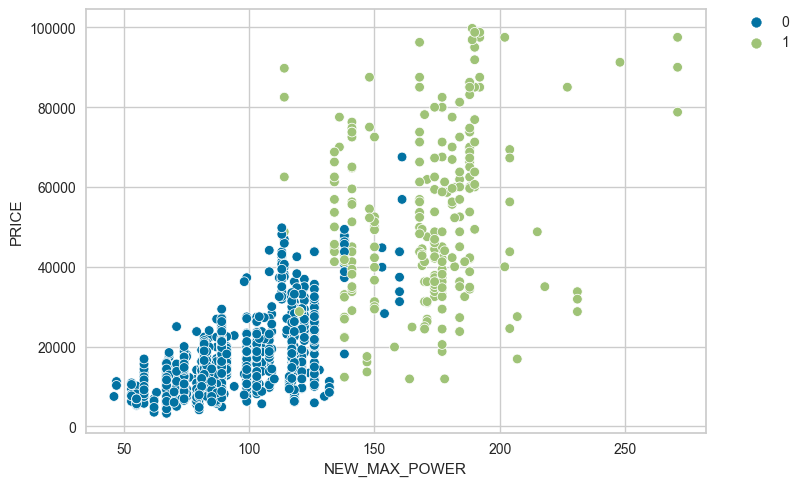

In [94]:
sns.scatterplot(x='NEW_MAX_POWER', y='PRICE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

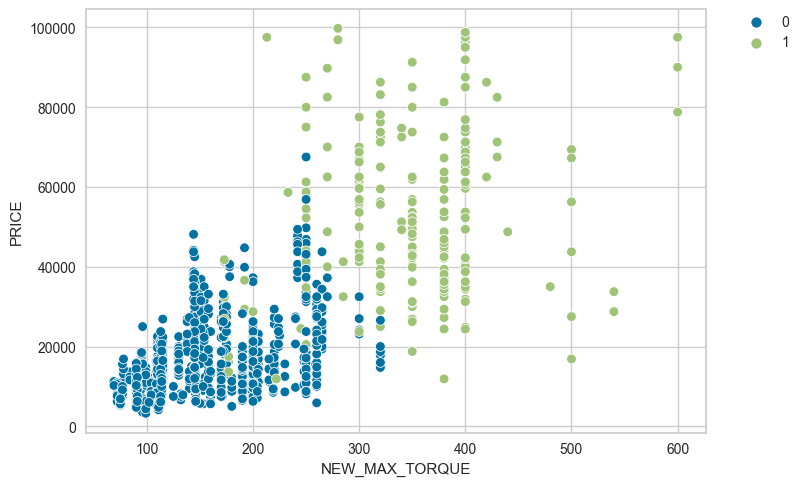

In [95]:
sns.scatterplot(x='NEW_MAX_TORQUE', y='PRICE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

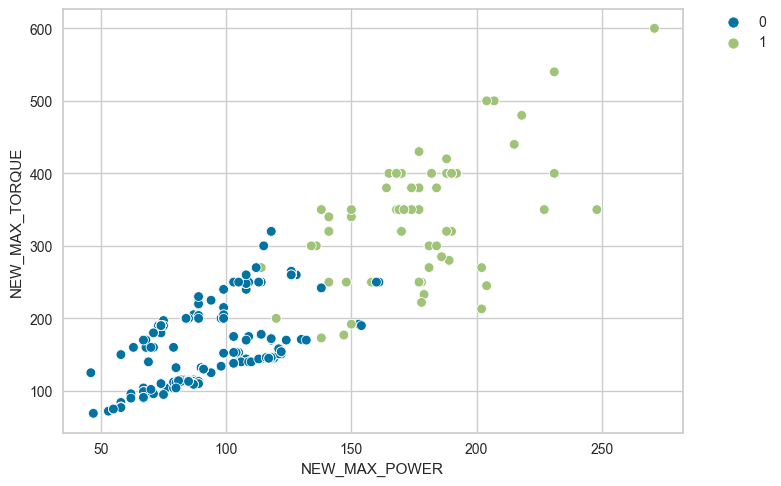

In [96]:
sns.scatterplot(x='NEW_MAX_POWER', y='NEW_MAX_TORQUE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

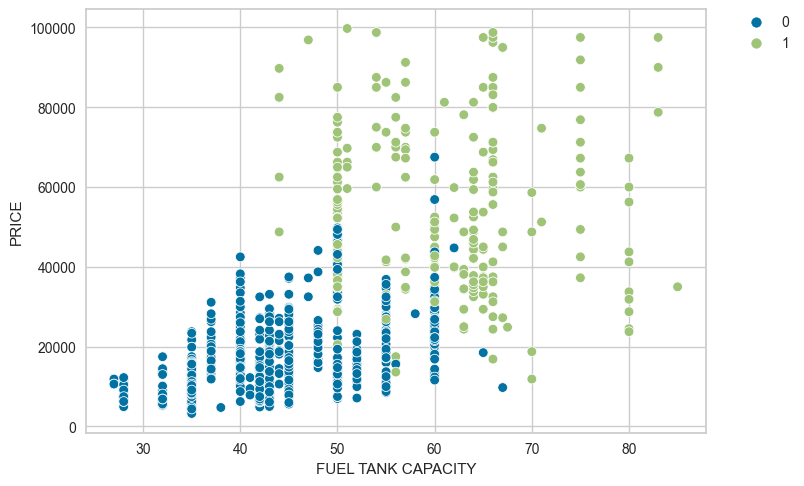

In [97]:
sns.scatterplot(x='FUEL TANK CAPACITY', y='PRICE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

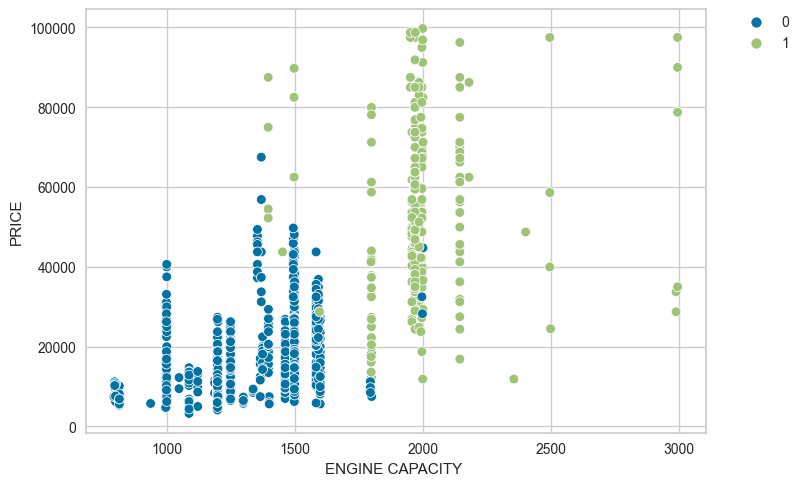

In [98]:
sns.scatterplot(x='ENGINE CAPACITY ', y='PRICE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

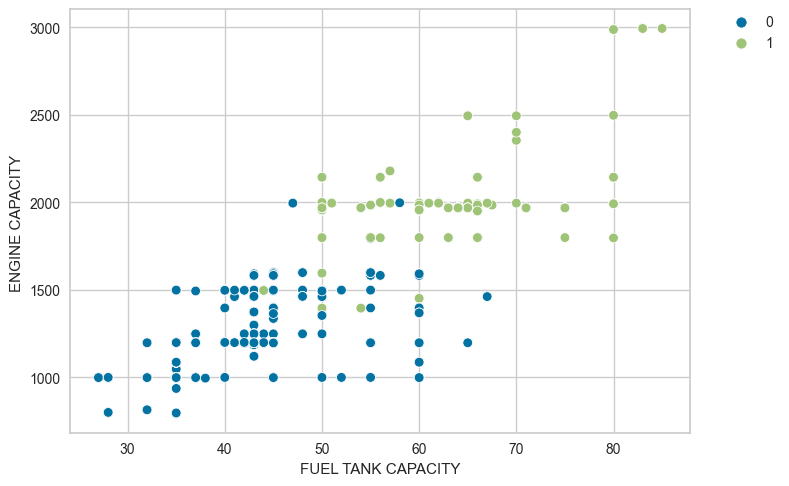

In [99]:
sns.scatterplot(x='FUEL TANK CAPACITY', y='ENGINE CAPACITY ', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

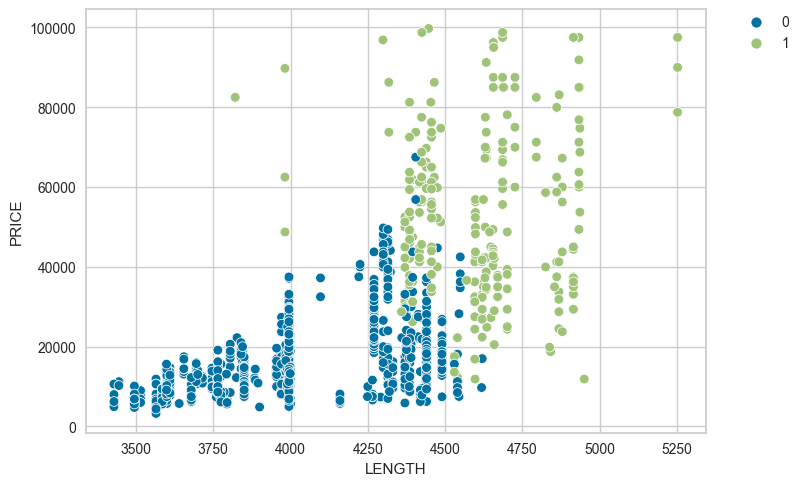

In [100]:
sns.scatterplot(x='LENGTH', y='PRICE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

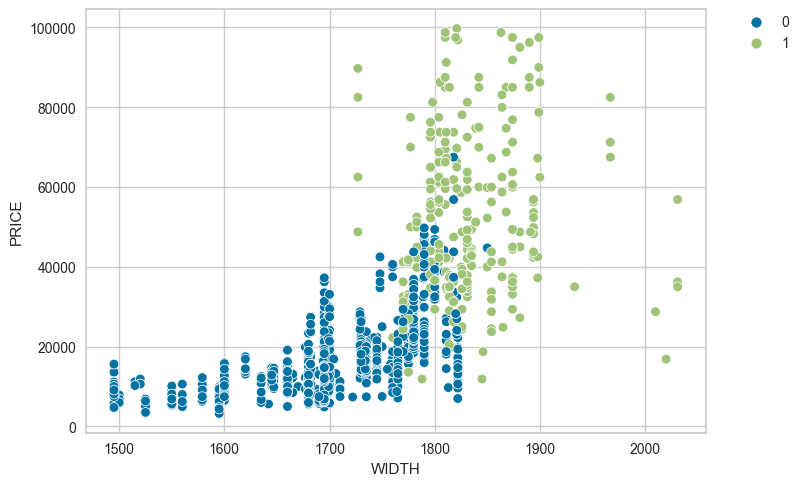

In [101]:
sns.scatterplot(x='WIDTH', y='PRICE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

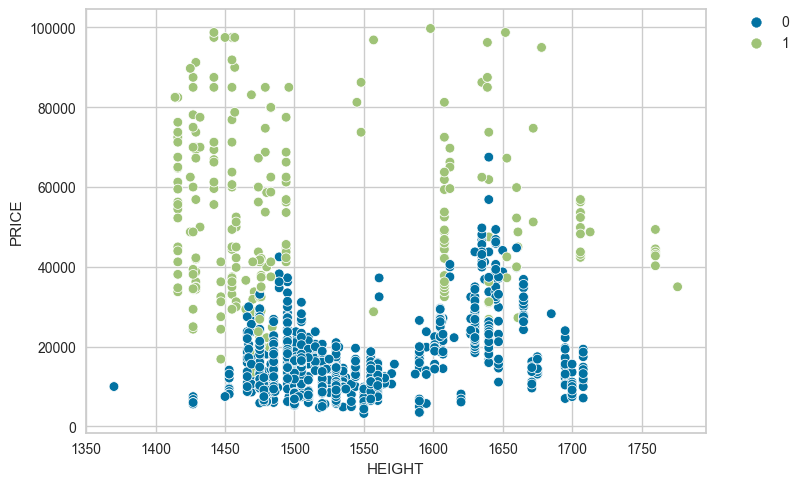

In [102]:
sns.scatterplot(x='HEIGHT', y='PRICE', data=ag_df, hue=y_prediction)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

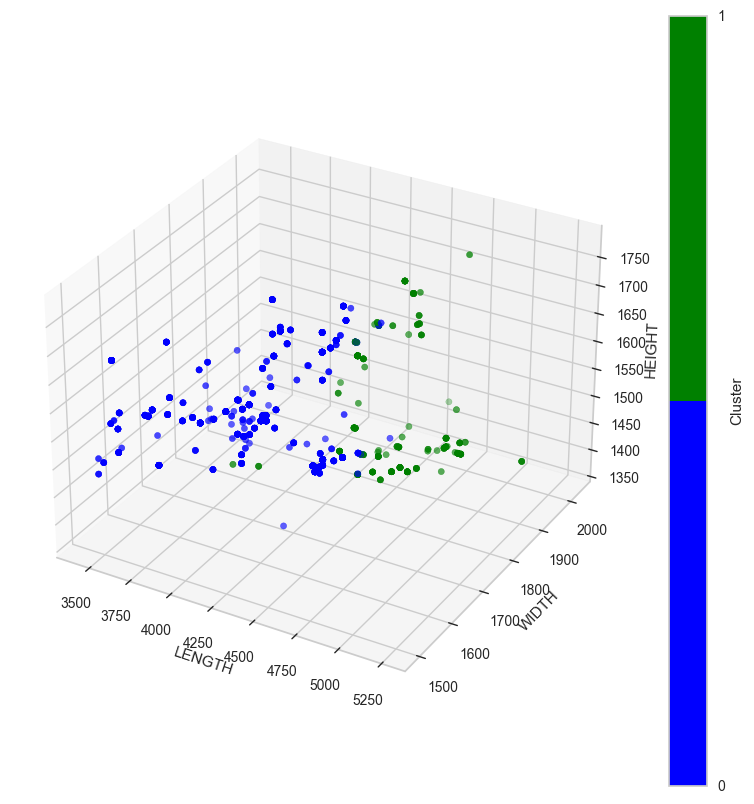

In [103]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x = ag_df['LENGTH']
y = ag_df['WIDTH']
z = ag_df['HEIGHT']

# Define custom colors for each cluster
colors = ['blue', 'green']

# Create a color map using the custom colors
cmap = plt.cm.colors.ListedColormap(colors)

scatter = ax.scatter(x, y, z, c=y_prediction, marker='o', cmap=cmap)

ax.set_xlabel('LENGTH')
ax.set_ylabel('WIDTH')
ax.set_zlabel('HEIGHT')

# Add a colorbar
cbar = plt.colorbar(scatter, ticks=np.unique(y_prediction))
cbar.set_label('Cluster')

plt.show()


In [104]:
# Number of values in each cluster
cluster_counts = ag_df['cluster_'].value_counts()

print(cluster_counts)

0    997
1    257
Name: cluster_, dtype: int64


### Cluster 0: Economic Cars

### Cluster 1: Luxury Cars

In [105]:
score = silhouette_score(X_scaled, y_prediction)

In [106]:
#Evaluate model
print(score)

0.41344229830939805


# Summary
1. Targeted Marketing: The reseller can focus their marketing efforts on a certain consumer category by knowing that there are two unique clusters of cars. They can develop targeted marketing efforts that draw attention to the economical vehicles in Cluster 0 and their competitive pricing, highlighting their suitability for clients on a tight budget. The superior performance, ample interior space, and opulent features that satisfy clients looking for a higher-end driving experience can be highlighted for the luxury vehicles in Cluster 1.

2. Pricing Strategy: Based on the cluster classification, the reseller can strategically establish prices. Despite having lower-ranked characteristics, the economical vehicles in Cluster 0 can be offered at a competitive price to take advantage of the larger demand. The reseller can reach a wider customer base and boost sales volume by providing competitive price for these vehicles. The reseller can maximize profit by establishing premium prices for the high-end vehicles in Cluster 1 that accurately reflect the cutting-edge features and opulence they provide.

3. Inventory Management: The reseller may manage their inventory properly with the help of the insights gathered from the clustering analysis. The reseller may guarantee a well-balanced inventory that suits the tastes of their target clients by analysing the demand discrepancy between the two clusters. In order to fulfil the increased demand, they can devote a bigger amount of their inventory to affordable vehicles in Cluster 0, while still offering a range of high-end vehicles in Cluster 1 to satisfy clients looking for an upscale driving experience.

4. Customer Experience: By adjusting their services in accordance with the distinctive traits and preferences of the clients in each cluster, the reseller may improve the customer experience. The emphasis might be on offering a simple and effective purchasing procedure, providing financing alternatives that are affordable, and highlighting the dependability and utility of the vehicles for economy car buyers in Cluster 0. The reseller can give priority to a distinctive and individualized customer experience for luxury car customers in Cluster 1 by offering extras like VIP treatment, extended warranties, and first-rate after-sales services.


Overall, by utilizing the information gained from the analysis, resellers can make informed decisions regarding pricing, inventory management, marketing strategies, and overall business operations. This can lead to improved revenue, increased customer satisfaction, and a competitive advantage in the used car market.